# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader, DataMultiverse
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date, WidgetCheckbox

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'SEQ',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('SEQ')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250707.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
261240    0.004209
329750    0.004209
440650    0.004209
Name: buy, dtype: float64

# Universe

In [4]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR, UV_MCR


In [5]:
WidgetUniverse

## K200

In [6]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
)
k200.download(**kw) if WidgetUniverse['Download'] else None

... done
200 securities from 2022-01-03 to 2025-07-10 downloaded.
kospi200_prices_250710.csv saved
1 files before 'kospi200_prices_250704.csv' deleted
Execution time of download: 23 secs


## WTR

In [6]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded


In [7]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [8]:
#PM.review_universe('UV_WTR')

In [9]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse['Download'] else None

... done
6 securities from 2022-01-03 to 2025-07-10 downloaded.
etfs_weather_250710.csv saved
1 files before 'etfs_weather_250704.csv' deleted
Execution time of download: 1 secs


In [181]:
#wtr.save()

## ETF

In [10]:
tickers = [
    '261240', '292560'
]

In [11]:
etf = PM.create_universe('UV_ETF')

2 securities from 2016-12-27 to 2025-07-09 uploaded.
Price data loaded


In [12]:
etf.get_names('selected')

0) 292560: TIGER 일본엔선물
1) 261240: KODEX 미국달러선물

In [13]:
#PM.review_universe('UV_WTR')

In [15]:
kw = dict(
    #n_years=3, 
    n_years=10, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    tickers = tickers
    #tickers = 'selected'
)
etf.download(**kw) if WidgetUniverse['Download'] else None

... done
2 securities from 2016-12-27 to 2025-07-10 downloaded.
etfs_all_250710.csv saved
Execution time of download: 0 secs


## FUND

In [4]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

40 securities from 2023-03-29 to 2025-07-09 uploaded.
Master data for 329 funds loaded.
Price data loaded


In [8]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_performance_by_asset().index.to_list()
#tickers = None
len(tickers)

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


25

In [9]:
# FISA
tickers += ['K55105CH3411', 'K55223BU8809', 'K55105BU7648', 'K55301BX0493', 'K55235CI9634',
            'K55306BT9453', 'K55236BG3001', 'K55101E95114', 'K55101E95247', 'K55235B96163', 'KR5235AK9691', 'K55236BG3274']
tickers += ['K55365BT3694', 'KR5363AC3714', 'K55364BU0797', 'K55234BX9892', 'K55105BV6805', 'KR5236267161']
tickers += ['K55301BU6139',  'K55365BT3694',  'KR5101888398', 'KR5370AP9956', 'K55234DF3150', 'K55213C50702', 'K55107BU0252',
 'K55206C11278', 'K55214B30803', 'K55306BT9453', 'KR5235AK9691', 'K55105BU7648', 'K55105CH3411', 'K55223BU8809', 'K55301BX0493',
 'K55301CC8789', 'K55101BV9571', 'K55214CD4825', 'K55107BB0404', 'KR5370AP9949', 'K55235CI9634', 'K55105BV6805', 'K55234BX9892',
 'K55364BU0797', 'KR5236267161', 'KR5363AC3714']
tickers = list(set(tickers))
len(tickers)

42

In [10]:
kw = dict(
    start_date = '2024-06-01',
    #n_years = 10,
    #close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'], backup_path = 'del',
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse['Download'] else None

Master data for 329 funds loaded.
42 tickers set to download


100%|███████████████████████████████████████████████████████████████| 42/42 [00:56<00:00,  1.34s/it]

2 tickers failed for conversion
... done
40 securities from 2023-03-29 to 2025-07-09 downloaded.
funds_prices_250709.csv saved
54 files before funds_prices_250702.csv removed
Execution time of download: 56 secs


In [23]:
#_ = fund.save()

ERROR: failed to save as funds_prices_250701.csv exists


In [24]:
#fund.portfolio_data['universe']

### Master

In [122]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55364BU0797,에셋플러스코리아리치투게더퇴직연금증권자투자신탁 1[주식]종류Ce,기업은행,퇴직연금,에셋플러스,주식,주식,국내
K55105BV6805,삼성퇴직연금액티브증권자투자신탁 1[주식]Ce,기업은행,퇴직연금,삼성,주식,주식,국내
K55234BX9892,IBK퇴직연금한국대표증권자투자신탁[주식]종류C-e,기업은행,퇴직연금,IBK,주식,주식,국내
KR5363AC3714,트러스톤장기성장퇴직연금증권자투자신탁[주식]Ce클래스,기업은행,퇴직연금,트러스톤,주식,주식,국내
KR5236267161,한국밸류10년투자퇴직연금증권자투자신탁 1(주식)(C-E),기업은행,퇴직연금,한국밸류,주식,주식,국내


In [123]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [105]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [130]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [131]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

5

In [132]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [133]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 15/15 [00:04<00:00,  3.67it/s]


4.1 secs elapsed, 0.0 secs paused (0.0%)


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.14it/s]

0.5 secs elapsed, 0.0 secs paused (0.0%)
funds_info_250707.csv saved


### Monthly

In [4]:
fund = PM.create_universe('UV_FNDM')

323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


In [6]:
fund.cleanup(dry_run=False)

3 files before 'fundm_prices_250130.csv' deleted


In [112]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse['Closed'],
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse['Download'] else None

Master data for 323 funds loaded.
Update existing data with 8 tickers
8 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 8/8 [01:20<00:00, 10.07s/it]

... done
323 securities from 2005-01-31 to 2025-03-31 downloaded.
ERROR: failed to save as fundm_prices_250331.csv exists
Execution time of download: 81 secs


In [113]:
_ = fund.save()

fundm_prices_250331.csv saved


### Cost

*Check missing cost data*

In [12]:
universe = 'UV_FUND'
#universe = 'UV_FNDM'

In [13]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250620.csv loaded
33 securities from 2023-03-29 to 2025-07-04 uploaded.
Master data for 329 funds loaded.
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [14]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

33 securities from 2023-03-29 to 2025-07-04 uploaded.
Master data for 329 funds loaded.
Price data loaded
Master data for 329 funds loaded.
Cost data transaction_cost_250620.csv loaded
Cost data saved to transaction_cost_250707.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [7]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

40 securities from 2023-03-29 to 2025-07-08 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded


In [8]:
import random
tickers = random.sample(list(fund.df_prices.columns), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']
#tickers = ['K55105CH3411']

In [9]:
fund.get_names(tickers)

0) K55364CF7048: 에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e
1) K55213C50702: 한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)
2) K55101BV9571: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)

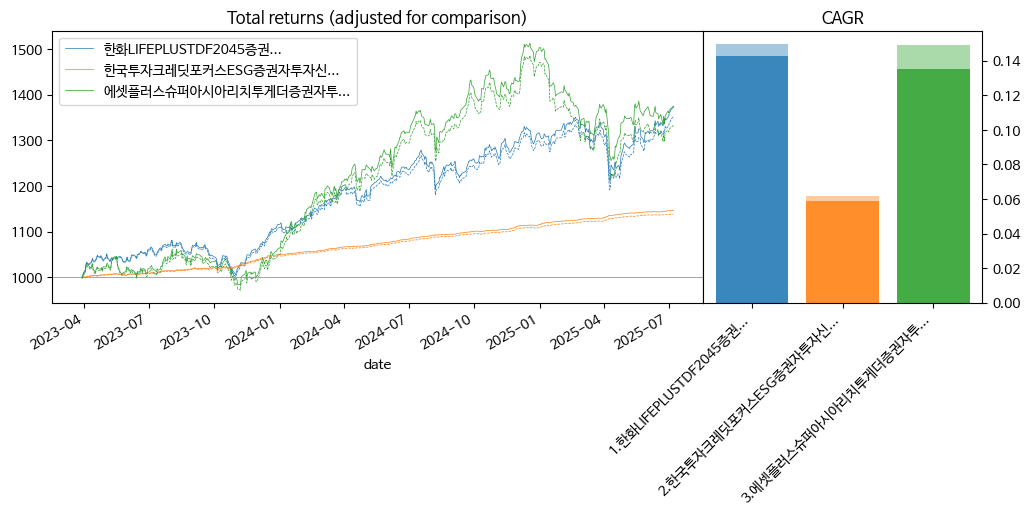

In [10]:
fund.plot(tickers, cost=cost, base=1000)

In [11]:
fund.performance(tickers, metrics=METRICS, sort_by='cagr')

,K55213C50702,K55364CF7048,K55101BV9571
start,2023-03-29,2023-03-29,2023-03-29
end,2025-07-08,2025-07-08,2025-07-08
total_return,0.374674,0.37313,0.145946
cagr,0.149926,0.149359,0.06163
calmar,1.440074,0.876721,12.284143
max_drawdown,-0.10411,-0.170361,-0.005017
avg_drawdown,-0.013521,-0.020082,-0.000609
avg_drawdown_days,17.384615,22.125,3.905263
daily_vol,0.091183,0.116828,0.009993
daily_sharpe,1.630663,1.29118,6.195889


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse['Download'] else None

## FCTR

In [12]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2022-01-03 to 2025-03-25 uploaded.
ERROR: Failed to get ticker names as Too Many Requests. Rate limited. Try after a while.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse['Download'] else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## LIQ

In [6]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [7]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-05-27 uploaded.
Price data loaded


In [10]:
liq.cleanup(dry_run=False)

58 files before 'krx_liq_prices_250521.csv' deleted


In [17]:
#liq.get_names()

In [19]:
kw = dict(
    n_years = 3, 
    tickers = selected, #selected,
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse['Download'] else None

ERROR: Failed to get ticker names
Execution time of download: 11 secs


## Additional Data

### Cost

*Check missing cost data*

In [4]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [5]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250707.csv loaded
323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


*Remove older cost files*

In [8]:
from pf_utils import DataManager
#dry_run = True
dry_run = False

DataManager.cleanup_files(file_cost, path_tran, dry_run=dry_run)

5 files before 'transaction_cost_250425.csv' deleted


### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2024-01-02 to 2025-06-27 loaded


In [7]:
start_fr = '2024-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse['Download']:
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse['Closed'],
        cleanup = WidgetUniverse['Cleanup'],
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [07:30<00:00,  2.25s/it]

7.5 mins elapsed, 16.0 secs paused (3.5%)
Financial ratios of 200 stocks from 2024-01-02 to 2025-07-09 downloaded
kospi200_ratios_250709.csv saved
18 files before 'kospi200_ratios_250425.csv' deleted


In [8]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [9]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Ratio: 2024-01-02 ~ 2025-07-09
Price: 2022-01-03 ~ 2025-07-10


# Performance

In [16]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [17]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_momentum_250616.csv loaded

PER_2410:
200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per2_250509.csv loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr_static_250213.csv loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr2412_static_250530.csv lo

In [18]:
pfs = {
    'SRT': ['pf_srt_static', 'UV_WTR'], 
    'SDS': ['pf_sds_static', 'UV_K200'], 
    'FXM': ['pf_fxm_static', 'UV_ETF']
}
for p, (f, u) in pfs.items():
    pfs[p] = PM.create_portfolio(p, file=f, universe=u, strategy='SEQ', path=path_tran, **kw_cost)

6 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_srt_static_250602.csv loaded
200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_sds_static_250609.csv loaded
2 securities from 2016-12-27 to 2025-07-10 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_fxm_static_250623.csv loaded


In [19]:
#pm.load('LIQ')
#pm.load(pf_srt, pf_sds, pf_fxm)
pm.load(*pfs.values())

SRT: imported
SDS: imported
FXM: imported


security_names updated
Data of tickers 009900, 016380 downloaded
security_names updated
Data of tickers 001740, 178920 downloaded


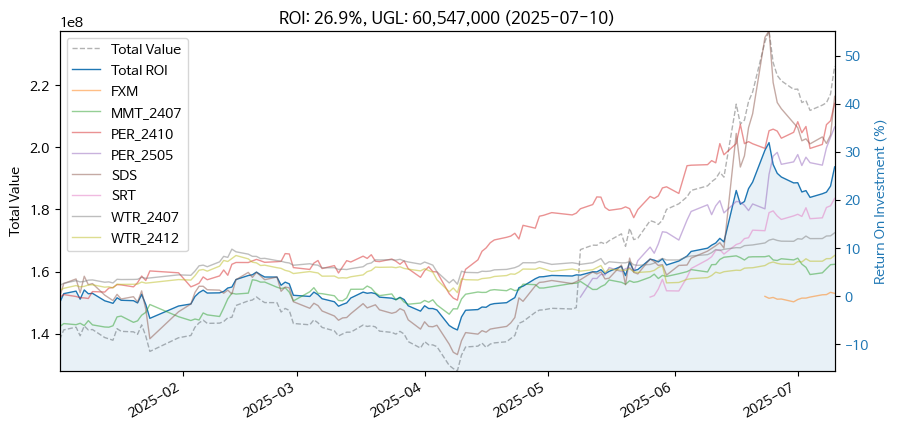

In [20]:
start_date='2025-01-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=True)

In [21]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [22]:
pm.summary(date=w_date.value, exclude_cost=False)

portfolio,FXM,MMT_2407,PER_2410,PER_2505,SDS,SRT,WTR_2407,WTR_2412,TOTAL
start,2025-06-23,2024-07-22,2024-10-17,2025-05-09,2025-01-02,2025-05-26,2024-07-18,2024-12-18,2024-07-18
end,2025-07-10,2025-07-10,2025-07-10,2025-07-10,2025-07-10,2025-07-10,2025-07-10,2025-07-10,2025-07-10
buy,"998,598","69,808,056","16,472,520","17,985,321","97,106,466","2,138,730","10,364,836","10,516,562","225,391,090"
sell,0.0,"56,214,884","2,617,050",0.0,0.0,0.0,"942,797",0.0,"59,774,732"
value,"1,004,458","18,218,315","20,454,719","24,307,603","137,412,172","2,573,342","10,786,864","11,405,743","226,163,216"
ugl,"5,860","4,625,143","6,599,249","6,322,282","40,305,706","434,612","1,364,826","889,181","60,546,858"
roi,0.00587,0.0663,0.401,0.352,0.415,0.203,0.132,0.0846,0.269


In [23]:
pm.performance_stats(sort_by='cagr')

Tickers 009900, 016380 added to universe
Tickers 001740, 178920 added to universe


,PER_2505,SRT,SDS,PER_2410,FXM,WTR_2412,WTR_2407,MMT_2407
start,2025-05-12,2025-05-27,2025-01-03,2024-10-18,2025-06-24,2024-12-19,2024-07-19,2024-07-23
end,2025-07-10,2025-07-10,2025-07-10,2025-07-10,2025-07-10,2025-07-10,2025-07-10,2025-07-10
total_return,0.303338,0.201675,0.378906,0.392787,0.010275,0.086504,0.131865,0.010279
cagr,4.155633,3.595402,0.86677,0.578761,0.262843,0.160993,0.135514,0.010668
calmar,195.257151,153.804927,5.326768,6.512782,28.700903,2.261806,2.040359,0.035416
max_drawdown,-0.021283,-0.023376,-0.16272,-0.088865,-0.009158,-0.071179,-0.066417,-0.301226
avg_drawdown,-0.012046,-0.013428,-0.057048,-0.021857,-0.005667,-0.010396,-0.01154,-0.115029
avg_drawdown_days,4.5,4.0,14.727273,9.045455,4.0,18.666667,19.625,114.0
daily_vol,0.271158,0.200256,0.47718,0.218302,0.054408,0.098522,0.080264,0.273951
daily_sharpe,6.155083,7.826261,1.593195,2.283448,3.97232,1.657243,1.702391,0.180316


Custom category loaded: portfolio2


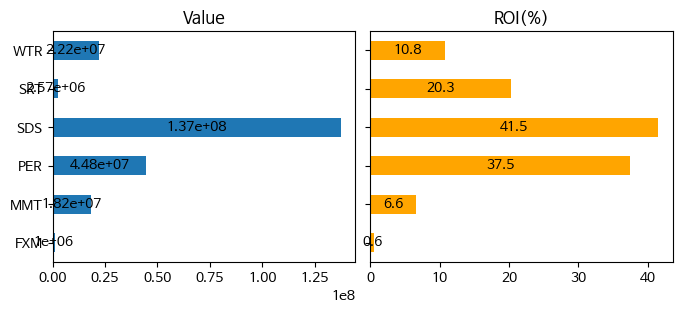

In [24]:
# custome category of portfolio type
df = pm.util_performance_by_asset()
sr = df.assign(portfolio2=lambda x: x['portfolio'].str.split('_').str[0])[['portfolio','portfolio2']]
pm.import_category(sr)

pm.summary(category='portfolio2', plot=True, figsize=(8,3))

*diversification metrics*

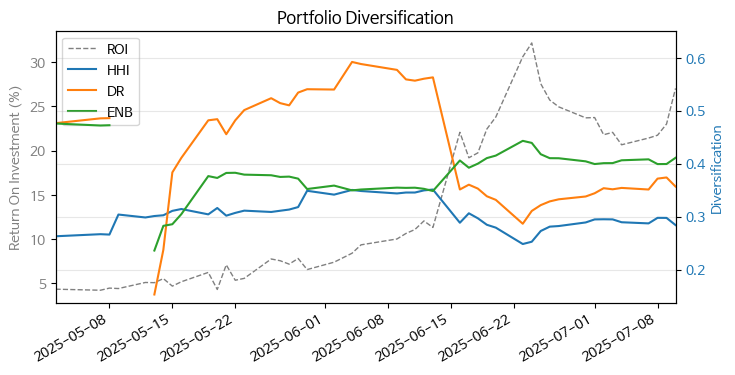

In [25]:
pfs = ['MMT', 'PER', 'WTR', 'SDS']
pm.diversification_history(*pfs, start_date='2025-05-01')

*print summary for google sheet 금융자산운용*

In [8]:
pm.util_print_summary(date=w_date.value)

2025-06-02, MMT, 2407, , , , 평가, , 61756350, 46784778, 17855971, 2884398, 0.0467
2025-06-02, PER, 2410, , , , 평가, , 12249374, 2617050, 10504989, 872665, 0.0712
2025-06-02, PER, 2505, , , , 평가, , 16292303, 0.0, 17685183, 1392880, 0.0855
2025-06-02, SRT, , , , 평가, , 2138820, 0.0, 2165987, 27167, 0.0127
2025-06-02, WTR, 2407, , , , 평가, , 10364836, 942797, 10202619, 780581, 0.0753
2025-06-02, WTR, 2412, , , , 평가, , 10516562, 0.0, 10816338, 299776, 0.0285


### All Funds

In [4]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=False)

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


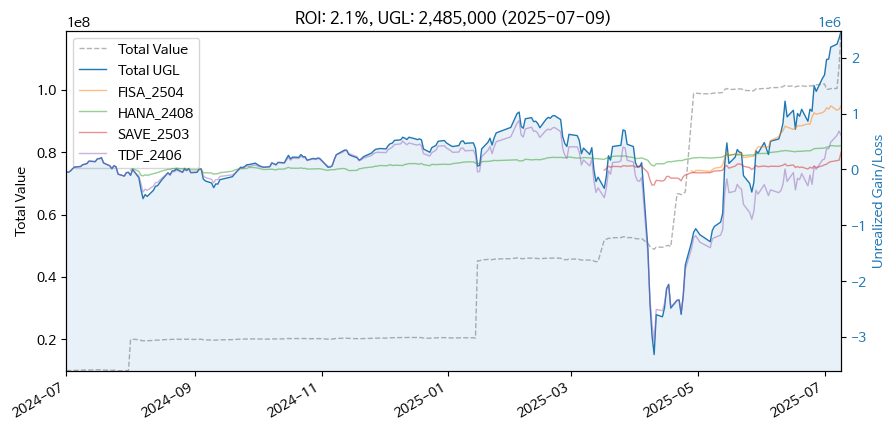

In [5]:
start_date='2024-07-01'
pm.plot(start_date=start_date, roi=False)

In [6]:
pm.summary()

portfolio,FISA_2504,HANA_2408,SAVE_2503,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2024-06-19,2024-06-19
end,2025-07-09,2025-07-09,2025-07-09,2025-07-09,2025-07-09
buy,"31,176,035","9,990,000","22,649,487","54,392,555","118,208,077"
sell,"-14,161",0.0,"1,975,860","-169,173","1,792,526"
value,"32,329,947","10,414,857","20,980,682","55,175,223","118,900,709"
ugl,"1,139,751","424,857","307,055","613,495","2,485,158"
roi,0.0366,0.0425,0.0136,0.0113,0.021


In [7]:
pm.performance_stats(sort_by='cagr')

,FISA_2504,HANA_2408,SAVE_2503,TDF_2406
start,2025-04-29,2024-08-02,2025-03-18,2024-06-20
end,2025-07-09,2025-07-09,2025-07-09,2025-07-09
total_return,0.038505,0.041059,0.011413,0.012158
cagr,0.214538,0.044043,0.037363,0.011561
calmar,66.106926,2.45239,0.764016,0.087114
max_drawdown,-0.003245,-0.017959,-0.048903,-0.132712
avg_drawdown,-0.001162,-0.003164,-0.019053,-0.03447
avg_drawdown_days,3.111111,10.12,35.0,50.0
daily_vol,0.025124,0.023587,0.073282,0.096934
daily_sharpe,8.254027,1.931166,0.549831,0.171792


In [27]:
file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')
category = 'asset'

Custom category loaded: account, asset, manager, region, seller, strategy


In [17]:
file = 'funds_custom_category_250711.csv'

# uncomment to save all tickers and their names in custom category file
#df = pm.util_performance_by_asset()
#df['name'].rename('name2').drop_duplicates().sort_values().to_csv(f'{path_data}/{file}')

pm.import_category(file, path_data)
category = 'name2'

Custom category loaded: name2


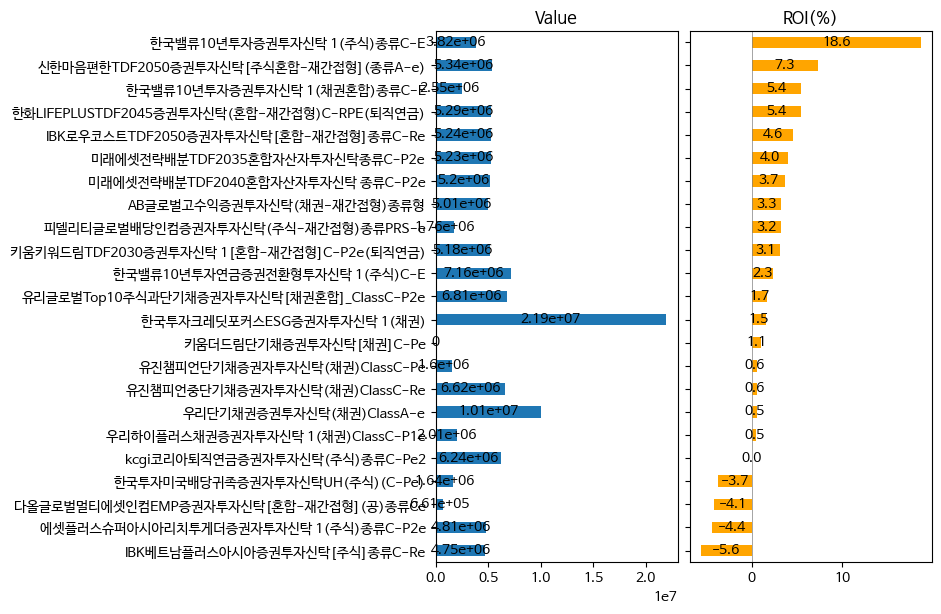

In [18]:
pm.summary(category=category, plot=True, roi=True, sort_by='roi')

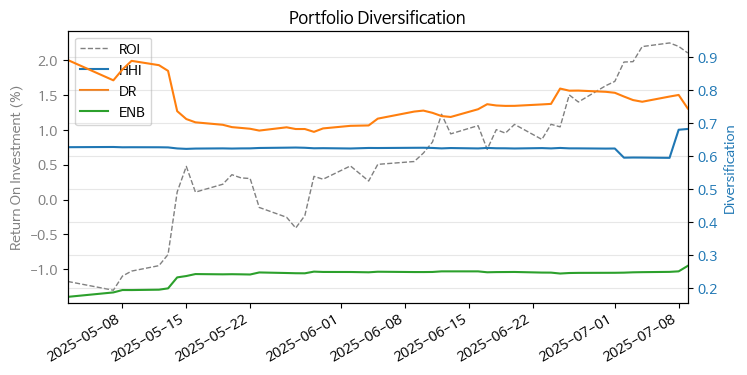

In [29]:
pm.diversification_history(start_date='2025-05-01')

In [10]:
pm.util_print_summary()

2025-06-02, FISA, 2504, , , , 평가, , 30960600, -251.0, 31380619, 419768, 0.0136
2025-06-02, HANA, 2408, , , , 평가, , 9990000, 0.0, 10275815, 285815, 0.0286
2025-06-02, SAVE, 2503, , , , 평가, , 10652630, -3481, 10726229, 70118, 0.00658
2025-06-02, TDF, 2406, , , , 평가, , 48148612, -103068, 48043823, -207857, -0.00432


# Research

## Search

In [21]:
dm = DataMultiverse('UV_FUND')

UV_FUND:
40 securities from 2023-03-29 to 2025-07-09 uploaded.
Master data for 329 funds loaded.
Price data loaded



In [22]:
dm.get_names(search='채권')

0) K55101BY3944(UV_FUND): 한국투자TIF알아서평생소득증권자투자신탁(채권혼합-재간접형)(C-Re)
1) KR5101888398(UV_FUND): 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)
2) KR5236AS4826(UV_FUND): 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E
3) KR5370AP9956(UV_FUND): AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce
4) K55370BU1979(UV_FUND): AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce-P
5) K55101CH6269(UV_FUND): 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Pe)
6) K55101E95114(UV_FUND): 한국투자미국장기국채증권자투자신탁H(채권-재간접형)(C-Pe)
7) K55101E95247(UV_FUND): 한국투자미국장기국채증권자투자신탁UH(채권-재간접형)(C-Pe)
8) K55102EF3612(UV_FUND): 하나크레딧플러스알파증권자투자신탁[채권]ClassC-PE
9) K55105BG6820(UV_FUND): 삼성클래식30연금증권전환형자투자신탁 1[채권혼합]_Ce
10) K55105BH0889(UV_FUND): 삼성클래식연금증권전환형투자신탁 1[채권]Ce
11) K55107BU0252(UV_FUND): 우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e
12) K55107EA9247(UV_FUND): 우리나라초단기채권증권투자신탁[채권]ClassC-P1e
13) K55206C11278(UV_FUND): 키움더드림단기채증권투자신탁[채권]C-Pe
14) K55206EA0246(UV_FUND): 키움초단기채증권투자신탁[채권]ClassC-Pe
15) K55207BU0699(UV_FUND): 교보악사Tomorrow장기우량증권투자신탁K-1(채권)ClassC-P2e
16) K55207D44267(UV_FUND): 교보악사삼성전자투게더증권투자신탁[채권혼합]ClassC-Pe(연금)
17) K55209BT8

## Data

In [8]:
n_years = 20

In [9]:
cb = WidgetCheckbox('Download', 'Append', as_accessor=True)
cb

### ETF

In [13]:
file = 'research_etf'
universe = 'UV_ETF'
retf = PM.create_universe(universe, file=file)
cetf = PM.get_cost(universe, file=file_cost, path=path_tran)

3 securities from 2016-12-27 to 2025-07-03 uploaded.
Price data loaded
Cost data transaction_cost_250620.csv loaded


In [14]:
tickers = ['329750', '261240', '440650']
retf.download(tickers=tickers, n_years=n_years, overwrite=True) if cb['Download'] else None

### FUND

In [22]:
file = 'research_fund'
universe = 'UV_FUND'
rfnd = PM.create_universe(universe, file=file)
cfnd = PM.get_cost(universe, file=file_cost, path=path_tran)

29 securities from 2008-11-17 to 2025-07-10 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded


In [20]:
tickers = ['K55301BU6253', 'K55206C95800', 'K55210CO3737']

In [ ]:
tickers = rfnd.get_names('selected')
tickers = list(tickers.keys())

In [ ]:
len(tickers)

26

In [21]:
rfnd.download(tickers=tickers, n_years=n_years, overwrite=True, append=cb['Append']) if cb['Download'] else None

Master data for 329 funds loaded.
Update existing data with 3 tickers
3 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:26<00:00,  8.95s/it]

... done
29 securities from 2008-11-17 to 2025-07-10 downloaded.
research_fund_250710.csv saved
Execution time of download: 27 secs


### MACRO

In [16]:
file = 'research_macro'
universe = 'UV_MCR'
rmcr = PM.create_universe(universe, file=file)

2 securities from 2004-12-31 to 2025-07-02 uploaded.
Price data loaded


In [40]:
tickers=['USD/KRW', '^NYICDX']
rmacro.download(tickers=tickers, n_years=n_years, overwrite=True) if cb['Download'] else None

## Compare

In [17]:
univ = ['ETF', 'FUND', 'MCR']
inst = [retf, rfnd, rmcr]
cost = [cetf, cfnd]
dm = DataMultiverse(*zip(univ, inst))
dm.set_cost(dict(zip(univ[:-1], cost)))

ETF: imported
FUND: imported
MCR: imported
Cost of ETF, FUND loaded
Cost of MCR set to zero


In [23]:
dm = DataMultiverse(('fund', rfnd))
dm.set_cost({'fund':cfnd})

fund: imported
Cost of fund loaded


In [54]:
#tickers = ['K55306BT9453', 'K55301BX0493', 'KR5235AK9691', 'K55223BU8809', 'K55105BU7648', 'K55235CI9634']
#tickers = ['K55306BT9453', 'K55301BX0493'] # china
#tickers = ['KR5235AK9691', 'K55223BU8809'] # eu
#tickers = ['K55105BU7648', 'K55235CI9634'] # india
#tickers = ['K55365BT3694', 'KR5363AC3714', 'K55364BU0797', 'K55234BX9892', 'K55105BV6805', 'KR5236267161'] # korea
tickers = ['K55107BB0404', 'KR5101888398']
#tickers = None

In [24]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=False)

file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')
#tickers = pm.util_performance_by_asset(category='asset:채권').index
tickers = pm.util_performance_by_asset(category='strategy:TDF').index

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported
Custom category loaded: account, asset, manager, region, seller, strategy


In [25]:
#dm.get_names('selected')
dm.get_names(tickers)

0) K55301BU6139(fund): 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800(fund): 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55301BU6253(fund): 미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e
3) K55234DF3150(fund): IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re
4) K55213C50702(fund): 한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)
5) K55210CO3737(fund): 신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)

In [27]:
# run to check missing tickers
#dm.get_prices(tickers)

In [31]:
dm.performance(tickers, sort_by='yearly_sharpe:5')

,K55213C50702(fund),K55206C95800(fund),K55301BU6253(fund),K55301BU6139(fund),K55210CO3737(fund)
start,2018-07-16,2018-10-22,2017-09-25,2017-09-25,2019-08-12
end,2025-07-10,2025-07-10,2025-07-10,2025-07-10,2025-07-10
total_return,0.634978,0.471602,0.704435,0.64248,0.512282
cagr,0.072928,0.059214,0.070856,0.065778,0.072481
calmar,0.274151,0.267521,0.309365,0.301885,0.260597
max_drawdown,-0.266013,-0.221345,-0.229037,-0.217889,-0.278133
avg_drawdown,-0.016685,-0.017443,-0.017767,-0.015494,-0.018428
avg_drawdown_days,26.255814,32.818182,33.684211,30.518072,28.101449
monthly_vol,0.127782,0.106139,0.110429,0.102081,0.130926
monthly_sharpe,0.605098,0.645021,0.682007,0.681669,0.619163


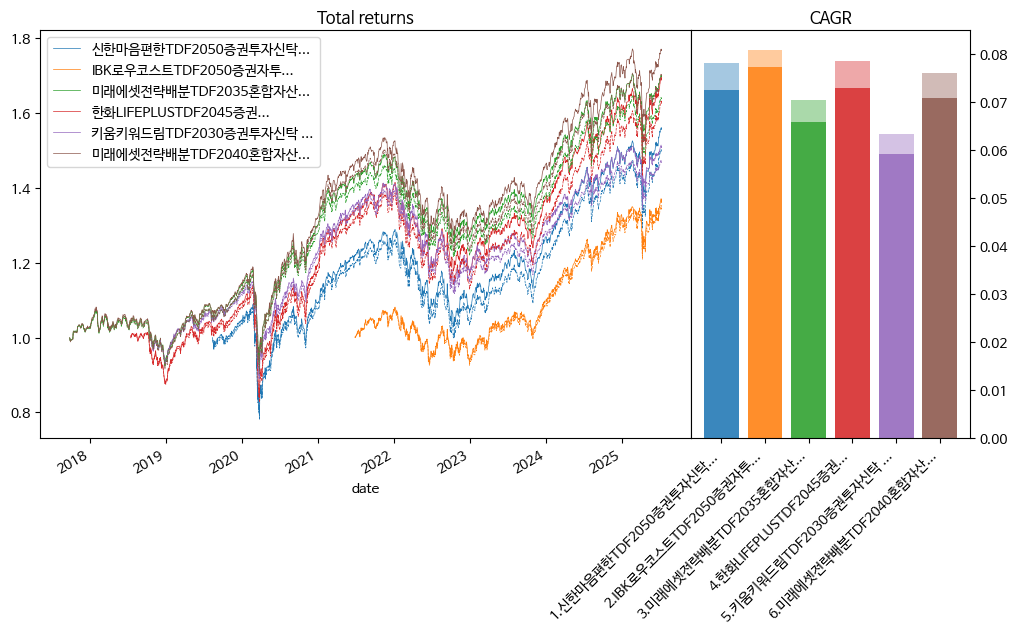

In [30]:
dm.plot(tickers, base=0, figsize=(12,6))

# Transaction

In [4]:
cleanup = WidgetCheckbox('Cleanup', as_accessor=True)
cleanup

## MMT

In [8]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_momentum_250616.csv loaded


In [9]:
# run after editting record file
#update = False
update = True
pf_mmt.update_record() if update else None

In [10]:
pf_mmt.view_record(-1, nshares=False)

name     ratio  transaction      net  weight  weight*  \
date       ticker                                                               
2025-06-16 000150         두산  1.001672      3588000  3588000     0.2    0.184   
           000880         한화  1.001992      4016000  4016000     0.2    0.206   
           003230       삼양식품  1.001566     -3831000        0     0.0    0.000   
           012450  한화에어로스페이스  1.000000       -60256  3880000     0.2    0.199   
           042660       한화오션  1.002350     -3574200        0     0.0    0.000   
           064350       현대로템  1.002018     -1982000  3964000     0.2    0.203   
           329180    HD현대중공업  1.002232       448000  4032000     0.2    0.207   

                       date*  
date       ticker             
2025-06-16 000150 2025-06-17  
           000880 2025-06-17  
           003230 2025-06-17  
           012450 2025-06-17  
           042660 2025-06-17  
           064350 2025-06-17  
           329180 2025-06-17

*daily transactions for book keeping*

In [29]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

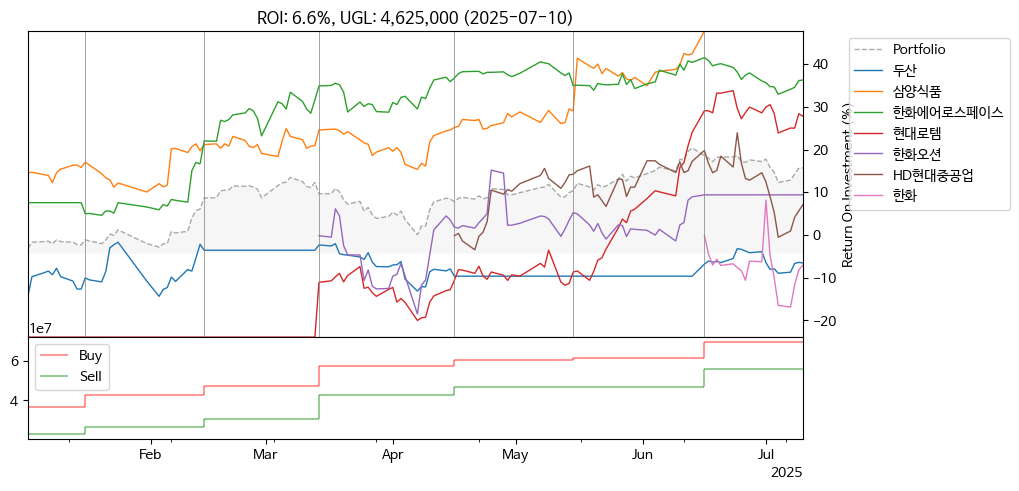

In [30]:
pf_mmt.plot(total=False, start_date='2025-01-01')

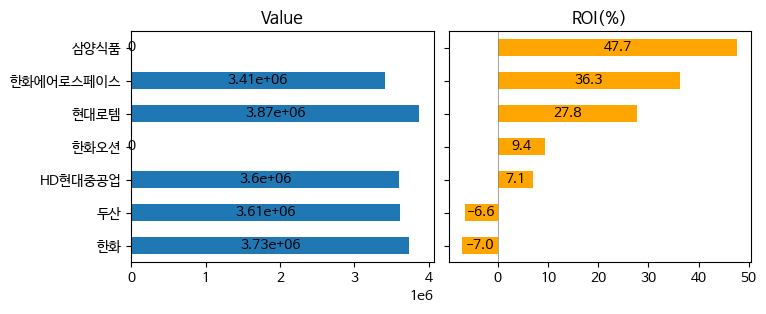

In [31]:
_ = pf_mmt.plot_assets(figsize=(8,3), exclude_sold=True)

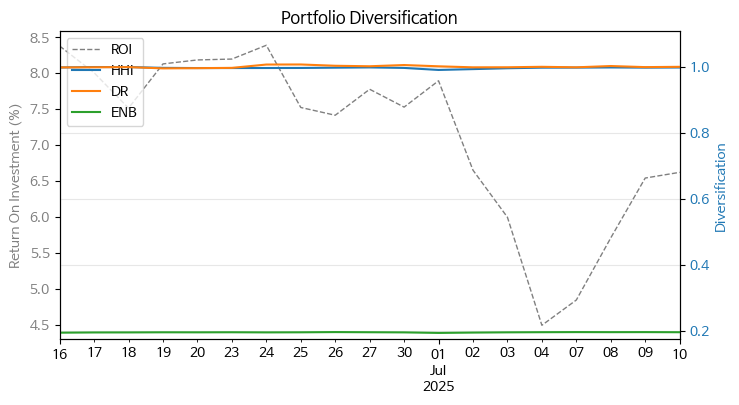

In [15]:
pf_mmt.diversification_history()

In [16]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-07-10, 69808056, 56214884, 18218316, 4625144, 0.0663


start    2024-07-22
end      2025-07-10
buy      69,808,056
sell     56,214,884
value    18,218,316
ugl       4,625,144
roi          0.0663
dtype: object

In [6]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [37]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    cleanup = cleanup[0]
)
#_ = pf_mmt.transaction_halt(**kw) 

In [10]:
date_actual = '2025-07-17'
capital = WidgetTransaction[1]
#capital = -0.02
    
kw = dict(
    nshares = True,
    date = WidgetTransaction[0],
    capital = capital,
    save = WidgetTransaction[2],
    cleanup = cleanup[0],
    date_actual=date_actual
)
_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-07-03 to 2025-07-03
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 2 %
Residual cash: 510,298
ROI: 6.0%, UGL: 4,612,213 (2025-07-10)
All transactions saved to pf_k200_momentum_250710.csv
4 files before 'pf_k200_momentum_250314.csv' moved to 'del'


In [11]:
pf_mmt.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2025-07-10 000150         두산  603000           -6    0     0.0    0.000   
           000880         한화   93500           -1   39     0.2    0.206   
           012450  한화에어로스페이스  853000            0    4     0.2    0.192   
           034020    두산에너빌리티   63100           57   57     0.2    0.203   
           064350       현대로템  193900           -2   18     0.2    0.197   
           272210      한화시스템   56200           64   64     0.2    0.203   
           329180    HD현대중공업  400500           -9    0     0.0    0.000   

                       date*  
date       ticker             
2025-07-10 000150 2025-07-17  
           000880 2025-07-17  
           012450 2025-07-17  
           034020 2025-07-17  
           064350 2025-07-17  
           272210 2025-07-17  
           329180 2025-07-17

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2],
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [22]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2024-01-02 to 2025-07-09 loaded


In [23]:
pf, date_actual, assets_old = 'PER_2410', '2025-11-12', ['017800']
#pf, date_actual, assets_old = 'PER_2505', '2026-05-12', ['015760']

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets


In [15]:
# run after editting record file
#pf_per.update_record()

In [12]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05    0.035   
           003030   세아제강지주  193300           -4    2    0.05    0.028   
           009970  영원무역홀딩스   85700           -6    5    0.05    0.031   
           016380     KG스틸    1012         -508  495    0.05    0.036   
           047040     대우건설    3635         -127  140    0.05    0.037   
           088350     한화생명    2865          180  180    0.05    0.037   
           078930       GS   41600           12   12    0.05    0.036   
           111770     영원무역   40150           12   12    0.05    0.035   
           139130  DGB금융지주    8250           63   63    0.05    0.038   
           005830   DB손해보험  106900            4    4    0.05    0.031   
           001450     현대해상   29750           17   17    0.05    0.037   
           009900     명신산업     991          500  500    0.05    0.036   
           241560     두산밥캣   40000           13   13    0.05    0.038   
           000270       기아   93600            5    5    0.05    0.034   
           024110     기업은행   14570           35   35    0.05    0.037   
           005850      에스엘   31350           16   16    0.05    0.036   
           316140   우리금융지주   16080           32   32    0.05    0.037   
           138930  BNK금융지주    9430           55   55    0.05    0.037   
           005380      현대차  209500            2    2    0.05    0.030   
           017800   현대엘리베이   46400          100  100     NaN    0.335   

                       date*  
date       ticker             
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [24]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-07-10, 16472520, 2617050, 20454730, 6599260, 0.401


start    2024-10-17
end      2025-07-10
buy      16,472,520
sell      2,617,050
value    20,454,730
ugl       6,599,260
roi           0.401
dtype: object

In [50]:
#pf_per.update_record()
#pf_per.view_record(-2)

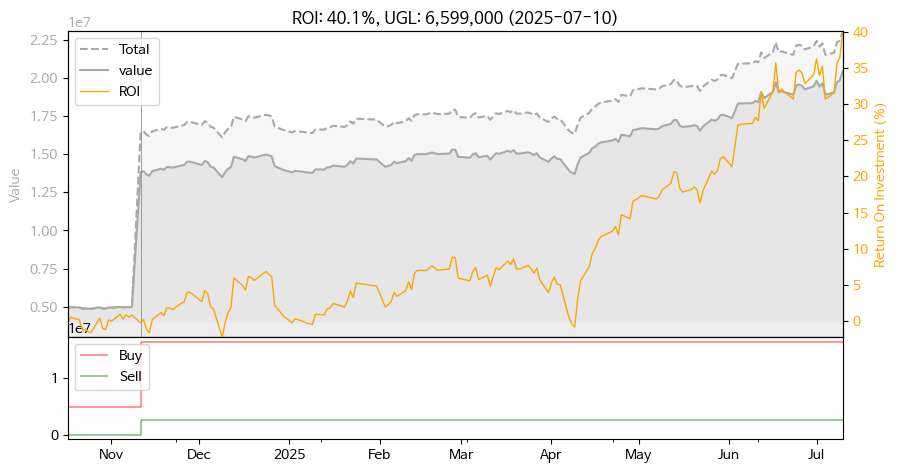

In [25]:
pf_per.plot()

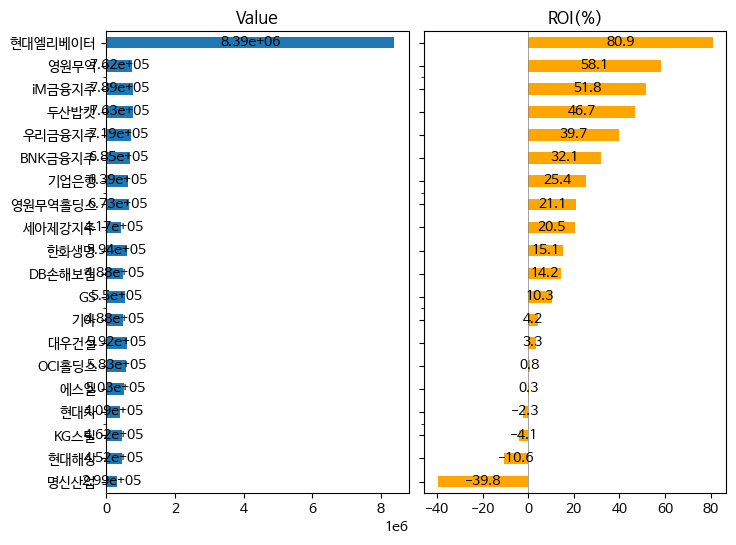

In [52]:
_ = pf_per.plot_assets(figsize=(8,6))

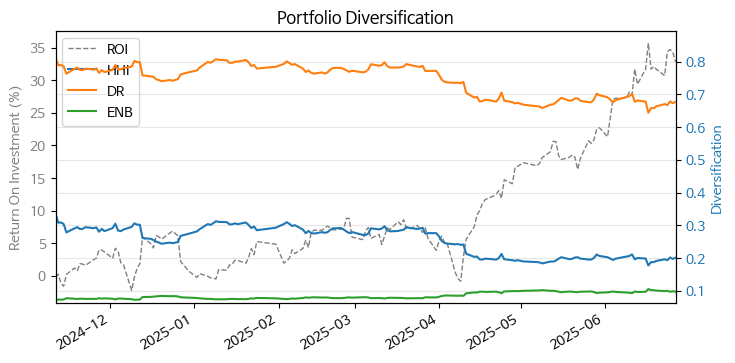

In [53]:
pf_per.diversification_history()

In [54]:
#_ = pf_per.util_plot_additional(legend=False, figsize=(6,4))

In [55]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [13]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
)
#_ = pf_per.transaction_halt(**kw) 

In [15]:
kw = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2],
    nshares = True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-05-09 to 2025-07-09
Weights of tickers determined by Equal weights.
security_names updated
Data of tickers 009900, 016380 downloaded
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 11 %
Tickers 009900, 016380 added to universe
Residual cash: 1,918,060
ROI: 21.8%, UGL: 6,550,103 (2025-07-10)
Set save=True to save transaction record


In [16]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-07-09 000240       한국앤컴퍼니   21900           45   45    0.05    0.054   
           000270           기아   99600            4    9    0.05    0.049   
           001450         현대해상   27550           19   36    0.05    0.055   
           003030       세아제강지주  234000           -2    0    0.00    0.000   
           004490         세방전지   70800           14   14    0.05    0.054   
           005380          현대차  209500            2    4    0.05    0.046   
           005830       DB손해보험  133400            3    7    0.05    0.051   
           005850          에스엘   31850           15   31    0.05    0.054   
           007340      DN오토모티브   25250           39   39    0.05    0.054   
           009240           한샘   50200           19   19    0.05    0.052   
           009900         명신산업    1000         -500    0    0.00    0.000   
           009970      영원무역홀딩스  139100            2    7    0.05    0.054   
           010060       OCI홀딩스   81100           -8    0    0.00    0.000   
           011200          HMM   24750           40   40    0.05    0.054   
           016380         KG스틸    1014         -495    0    0.00    0.000   
           017800      현대엘리베이터   83200         -100    0    0.00    0.000   
           024110         기업은행   20150          -35    0    0.00    0.000   
           036460       한국가스공사   44800           22   22    0.05    0.054   
           047040         대우건설    4175         -140    0    0.00    0.000   
           071320       지역난방공사   90500           10   10    0.05    0.050   
           073240        금호타이어    4905          202  202    0.05    0.054   
           078930           GS   53000          -12    0    0.00    0.000   
           088350         한화생명    3755           84  264    0.05    0.055   
           111770         영원무역   59200          -12    0    0.00    0.000   
           138930      BNK금융지주   14440          -55    0    0.00    0.000   
           139130       iM금융지주   14350          -63    0    0.00    0.000   
           161390  한국타이어앤테크놀로지   43600           22   22    0.05    0.053   
           241560         두산밥캣   56600          -13    0    0.00    0.000   
           316140       우리금융지주   24900            7   39    0.05    0.053   
           402340        SK스퀘어  181200            5    5    0.05    0.050   
           456040          OCI   56000           17   17    0.05    0.052   

                       date*  
date       ticker             
2025-07-09 000240 2025-11-12  
           000270 2025-11-12  
           001450 2025-11-12  
           003030 2025-11-12  
           004490 2025-11-12  
           005380 2025-11-12  
           005830 2025-11-12  
           005850 2025-11-12  
           007340 2025-11-12  
           009240 2025-11-12  
           009900 2025-11-12  
           009970 2025-11-12  
           010060 2025-11-12  
           011200 2025-11-12  
           016380 2025-11-12  
           017800 2025-11-12  
           024110 2025-11-12  
           036460 2025-11-12  
           047040 2025-11-12  
           071320 2025-11-12  
           073240 2025-11-12  
           078930 2025-11-12  
           088350 2025-11-12  
           111770 2025-11-12  
           138930 2025-11-12  
           139130 2025-11-12  
           161390 2025-11-12  
           241560 2025-11-12  
           316140 2025-11-12  
           402340 2025-11-12  
           456040 2025-11-12

*New asset turnover*

In [17]:
pf_per.util_check_entry_turnover()

,New,Total,Ratio
date,,,
2024-10-17,5.0,5.0,1.000
2024-11-11,15.0,20.0,0.750
2025-07-09,11.0,19.0,0.579


*Compare tickers of PER_2410 and PER_2505*

In [14]:
p1 = PM.create_portfolio('PER_2410')
p2 = PM.create_portfolio('PER_2505')
df1 = p1.valuate(total=False)
df2 = p2.valuate(total=False)
tkrs = df2.index.difference(df1.index)
#df.loc[tkrs]
print(f'Number of new assets: {tkrs.size}')

200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets
200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per2_250509.csv loaded
security_names updated
Data of tickers 009900, 016380 downloaded
Number of new assets: 13


*Performance without old assets*

In [20]:
_ = pf_per.transaction_halt(halt=assets_old) 

pf_per.valuate()
#pf_per.plot()

security_names updated
Data of tickers 009900, 016380 downloaded
Trading of assets 017800 to halt
Updated with transaction on 2025-07-10
Set save=True to save transaction record
ROI: 21.7%, UGL: 2,565,363 (2025-07-10)


start    2024-10-17
end      2025-07-10
buy      11,832,689
sell      2,617,050
value    11,781,002
ugl       2,565,363
roi           0.217
dtype: object

## WTR
*modified all weather*

In [62]:
# pf & rebal date
pf, date_actual = 'WTR_2407', '2025-08-14'
#pf, date_actual = 'WTR_2412', '2025-12-12'

In [63]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-07-07 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr_static_250213.csv loaded


In [64]:
#pf_wtr.portfolio_data['strategy']
#pf_wtr.update_record()

In [65]:
pf_wtr.view_record(-2, nshares=False)

name     ratio  transaction      net  \
date       ticker                                                         
2024-11-20 069500             KODEX 200  1.000000       231070  1617490   
           148070          KOSEF 국고채10년  0.999744      -117035  1521455   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000            0  1607410   
           284430        KODEX 200미국채혼합  0.999603        62925  1623464   
           379800      KODEX 미국S&P500TR  1.001064      -150320  1615940   
           411060            ACE KRX금현물  1.004401      -170400  1635840   
2025-02-13 069500             KODEX 200  0.991447        52641  1758990   
           148070         KIWOOM 국고채10년  0.997349       177132  1725450   
           273130  KODEX 종합채권(AA-이상)액티브  1.000000            0  1639750   
           284430        KODEX 200미국채혼합  0.995416        65450  1754060   
           379800        KODEX 미국S&P500  0.992332        20215  1758705   
           411060            ACE KRX금현물  0.959900      -505365  1804875   

                   weight  weight*      date*  
date       ticker                              
2024-11-20 069500  0.1670    0.168 2024-11-20  
           148070  0.1670    0.158 2024-11-20  
           273130  0.1670    0.167 2024-11-20  
           284430  0.1670    0.169 2024-11-20  
           379800  0.1670    0.168 2024-11-20  
           411060  0.1670    0.170 2024-11-20  
2025-02-13 069500  0.1667    0.168 2025-02-14  
           148070  0.1667    0.165 2025-02-14  
           273130  0.1667    0.157 2025-02-14  
           284430  0.1667    0.168 2025-02-14  
           379800  0.1667    0.168 2025-02-14  
           411060  0.1667    0.173 2025-02-14

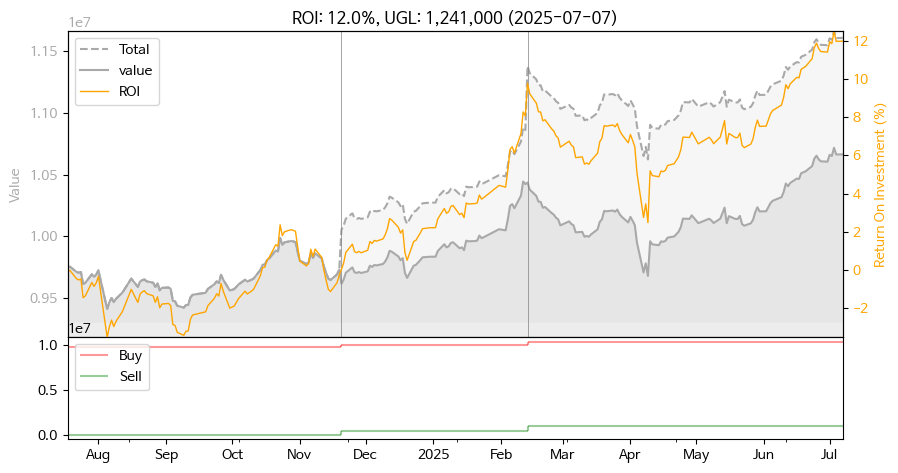

In [66]:
pf_wtr.plot(total=True)

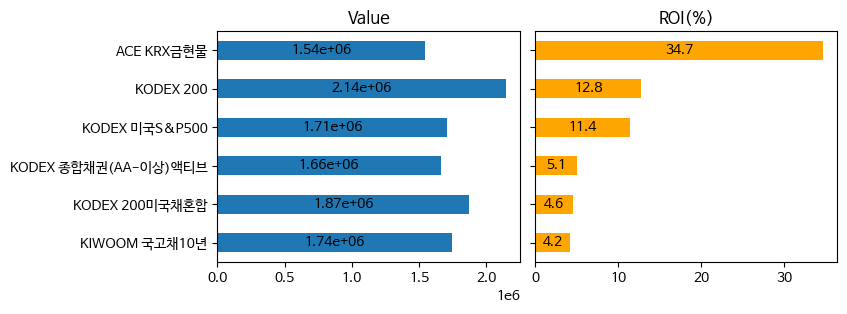

In [67]:
_ = pf_wtr.plot_assets(figsize=(8,3))

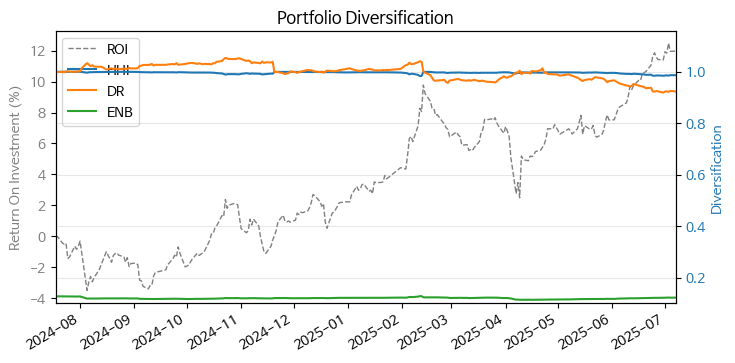

In [68]:
pf_wtr.diversification_history()

In [70]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-07-07, 10364836, 942797, 10663090, 1241052, 0.12


start    2024-07-18
end      2025-07-07
buy      10,364,836
sell        942,797
value    10,663,090
ugl       1,241,052
roi            0.12
dtype: object

In [36]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [37]:
#pf_wtr.performance_stats(metrics=METRICS)

In [69]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [71]:
capital = WidgetTransaction[1]
#capital = 0.8
    
kw = dict(
    nshares = True,
    date = WidgetTransaction[0],
    capital = capital,
    save = WidgetTransaction[2],
    date_actual = date_actual
)

_ = pf_wtr.transaction_pipeline(**kw)

6 tickers selected by Selected from 2025-07-07 to 2025-07-07
Weights of tickers determined by Equal weights.
Rebalancing with contribution 10,000,000
Mean absolute error of weights: 1 %
Deployed capital: 9,858,872
ROI: 6.1%, UGL: 1,235,846 (2025-07-07)
Set save=True to save transaction record


In [72]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34061            2   52  0.1667   
           148070         KIWOOM 국고채10년  115030            2   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20154            1   87  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-07-07 069500             KODEX 200   41555           30   82  0.1667   
           148070         KIWOOM 국고채10년  116155           14   29  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  118585           15   29  0.1667   
           284430        KODEX 200미국채혼합   13980          112  246  0.1667   
           379800        KODEX 미국S&P500   19565           89  176  0.1667   
           411060            ACE KRX금현물   20550           92  167  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-07-07 069500    0.166 2025-08-14  
           148070    0.164 2025-08-14  
           273130    0.168 2025-08-14  
           284430    0.168 2025-08-14  
           379800    0.168 2025-08-14  
           411060    0.167 2025-08-14

In [72]:
pf_wtr.performance_stats()

,Realized,Simulated (250707)
start,2024-07-19,2022-01-03
end,2025-07-07,2025-07-07
total_return,0.119921,0.292756
cagr,0.124332,0.075961
calmar,1.871993,0.64724
max_drawdown,-0.066417,-0.117362
avg_drawdown,-0.01154,-0.01352
avg_drawdown_days,19.5625,35.757576
monthly_vol,0.050734,0.075913
monthly_sharpe,2.395335,1.178283


In [35]:
#pf_wtr.valuate(total=False)

## SRT

In [6]:
kw = dict(
    file='pf_srt_static', path=path_tran,
    universe='UV_WTR', strategy='SEQ',
    **kw_cost
)
pf_srt = PM.create_portfolio('SRT', **kw)

6 securities from 2022-01-03 to 2025-07-08 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_srt_static_250602.csv loaded


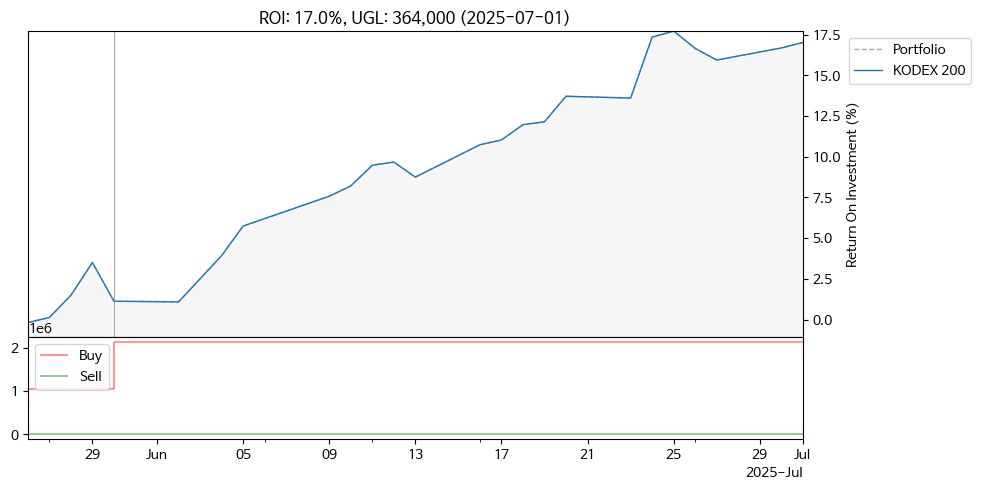

In [7]:
pf_srt.plot(total=False)

In [6]:
pf_srt.valuate()

start    2025-05-26
end      2025-06-09
buy       2,138,730
sell            0.0
value     2,300,747
ugl         162,017
roi          0.0758
dtype: object

In [9]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
date_actual = '2025-06-02'
kw = dict(
    buy = {'069500': 1082460}, 
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual = date_actual,
)
_ = pf_srt.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-02
All transactions saved to pf_srt_static_250602.csv
ROI: 1.1%, UGL: 24,074 (2025-06-02)


In [21]:
pf_srt.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-05-26,069500,KODEX 200,35190,30,30,1.0,1.0,2025-05-27
2025-05-30,069500,KODEX 200,36140,30,60,1.0,1.0,2025-06-02


## SDS

In [7]:
kw = dict(
    file='pf_sds_static', path=path_tran,
    universe='UV_K200', strategy='SEQ',
    **kw_cost
)
pf_sds = PM.create_portfolio('SDS', **kw)

200 securities from 2022-01-03 to 2025-07-08 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_sds_static_250609.csv loaded


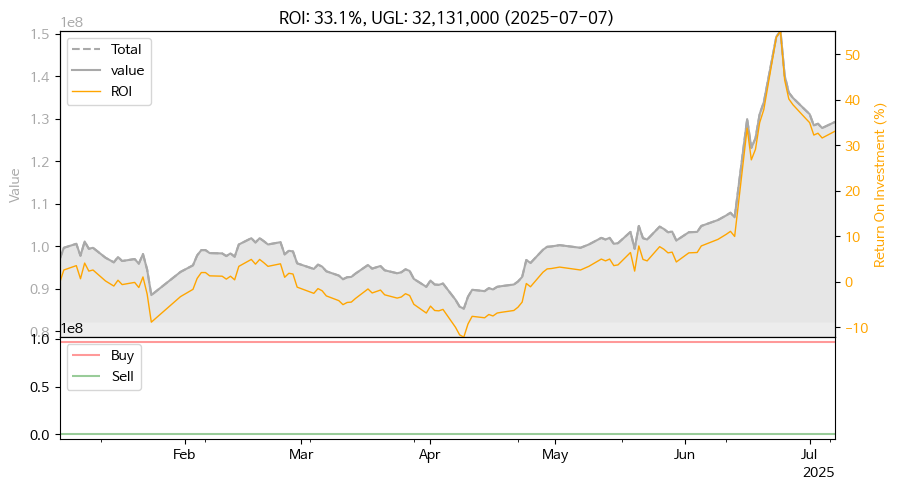

In [55]:
pf_sds.plot()

In [56]:
pf_sds.performance_stats()

,Realized,Simulated (250707)
start,2025-01-03,2022-01-03
end,2025-07-07,2025-07-07
total_return,0.296875,0.060703
cagr,0.670696,0.016945
calmar,4.12179,0.046708
max_drawdown,-0.16272,-0.362791
avg_drawdown,-0.057048,-0.138633
avg_drawdown_days,14.454545,211.0
monthly_vol,0.451393,0.280911
monthly_sharpe,1.614348,0.298761


In [57]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [60]:
#capital = {'018260': 97110000} # = 780 * price on 2025-01-02
capital = {'018260': -10000000} # test sell

kw = dict(
    capital = capital,
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
)
_ = pf_sds.transaction_pipeline(**kw)

1 tickers selected by Selected from 2025-07-07 to 2025-07-07
Weights of tickers determined by Specified.
Rebalancing with residual 10,000,000
Mean absolute error of weights: 0 %
Residual cash: 10,126,000
ROI: 33.1%, UGL: 32,131,413 (2025-07-07)
Set save=True to save transaction record


In [61]:
pf_sds.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-01-02,018260,삼성에스디에스,124500,780,780,1.0,1.0,2015-01-01
2025-07-07,018260,삼성에스디에스,166000,-61,719,1.0,1.0,2025-07-07


## FXM

In [8]:
kw = dict(
    file='pf_fxm_static', path=path_tran,
    universe='UV_ETF', strategy='SEQ',
    **kw_cost
)
pf_fxm = PM.create_portfolio('FXM', **kw)

2 securities from 2016-12-27 to 2025-07-08 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_fxm_static_250623.csv loaded


In [11]:
#pf_fxm.update_record()

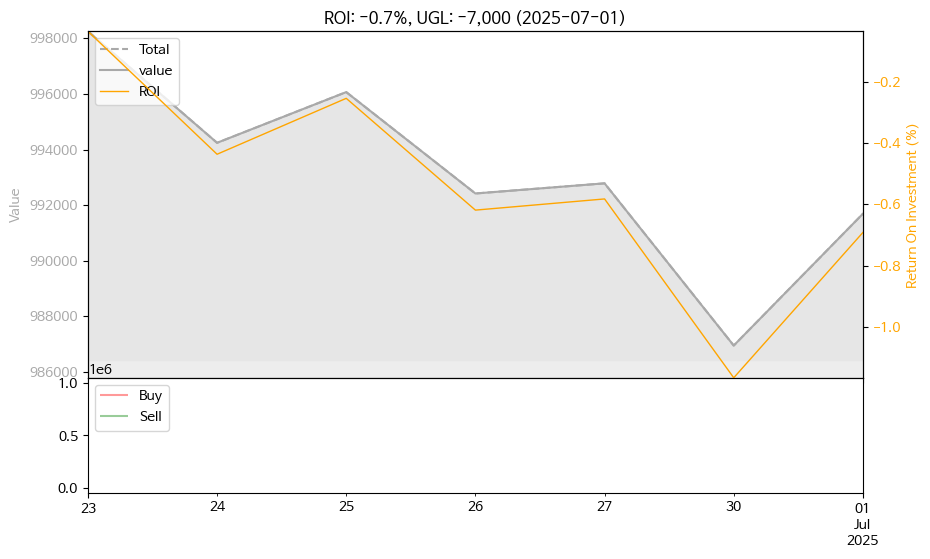

In [12]:
pf_fxm.plot()

In [41]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [70]:
#capital = WidgetTransaction[1]
capital = {'261240': 1e6}

kw = dict(
    date = WidgetTransaction[0],
    capital = capital,
    save = WidgetTransaction[2],
    nshares = True
)
_ = pf_fxm.transaction_pipeline(**kw)

1 tickers selected by Selected from 2025-06-24 to 2025-06-24
Weights of tickers determined by Specified.
Rebalancing with contribution 1,000,000.0
Mean absolute error of weights: 0 %
Deployed capital: 994,625
ROI: -0.2%, UGL: -4,696 (2025-06-24)
Set save=True to save transaction record


In [71]:
pf_fxm.view_record(nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-06-23,261240,KODEX 미국달러선물,13680,73,73,1.0,1.0,2025-06-24
2025-06-24,261240,KODEX 미국달러선물,13625,73,146,1.0,1.0,2025-06-24


## LIQ

In [4]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-05-27 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_liq_static_250526.csv loaded


In [5]:
pf_liq.cleanup(dry_run=True)

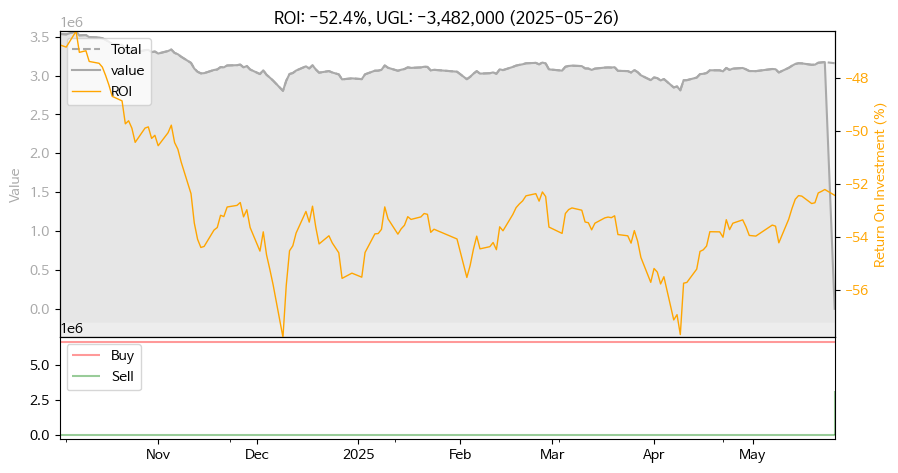

In [29]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

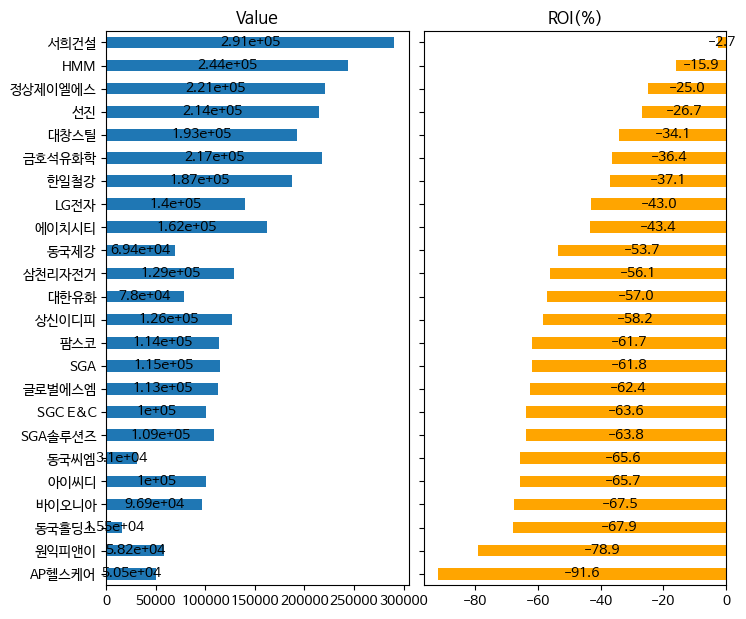

In [30]:
_ = pf_liq.plot_assets(date='2025-05-25', figsize=(8,6))

In [31]:
pf_liq.valuate()
#pf_liq.valuate(total=False).sort_values('name')

start    2024-01-03
end      2025-05-26
buy       6,641,836
sell      3,159,668
value           0.0
ugl      -3,482,168
roi          -0.524
dtype: object

In [23]:
sell = {
    '035890': 297492, '001230': 14920, '011200': 236225, '460850': 30950, '040420': 221630, '136490': 225630, 
    '460860': 66605, '140520': 194402, '006650': 79800, '066570': 137000, '002220': 186024, '011780': 224300,
    '072990': 158680, '024950': 127800, '091580': 126450, '036580': 123333, '016250': 93230, '049470': 94978,
    '900070': 114406, '184230': 107362, '040910': 99602, '064550': 96420, '217820': 58234, '109960': 50008
}
# cross-check
sum([x for x in sell.values()])

3165481

In [26]:
kw = dict(
    sell = sell, 
    date_actual = '2025-05-27',
    save = True,
)
#_ = pf_liq.transaction_halt(**kw) 

REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-05-26
All transactions saved to pf_liq_static_250526.csv
ROI: -52.4%, UGL: -3,482,168 (2025-05-26)


In [27]:
pf_liq.view_record(-1)

name  ratio  transaction  net  weight  weight*  \
date       ticker                                                      
2025-05-26 001230    동국홀딩스    1.0       -14920    0     NaN      NaN   
           002220     한일철강    1.0      -186024    0     NaN      NaN   
           006650     대한유화    1.0       -79800    0     NaN      NaN   
           011200      HMM    1.0      -236225    0     NaN      NaN   
           011780     금호석유    1.0      -224300    0     NaN      NaN   
           016250  SGC E&C    1.0       -93230    0     NaN      NaN   
           024950   삼천리자전거    1.0      -127800    0     NaN      NaN   
           035890     서희건설    1.0      -297492    0     NaN      NaN   
           036580      팜스코    1.0      -123333    0     NaN      NaN   
           040420  정상제이엘에스    1.0      -221630    0     NaN      NaN   
           040910     아이씨디    1.0       -99602    0     NaN      NaN   
           049470      SGA    1.0       -94978    0     NaN      NaN   
           064550    바이오니아    1.0       -96420    0     NaN      NaN   
           066570     LG전자    1.0      -137000    0     NaN      NaN   
           072990    에이치시티    1.0      -158680    0     NaN      NaN   
           091580    상신이디피    1.0      -126450    0     NaN      NaN   
           109960   AP헬스케어    1.0       -50008    0     NaN      NaN   
           136490       선진    1.0      -225630    0     NaN      NaN   
           140520     대창스틸    1.0      -194402    0     NaN      NaN   
           184230  SGA솔루션즈    1.0      -107362    0     NaN      NaN   
           217820    원익피앤이    1.0       -58234    0     NaN      NaN   
           460850     동국씨엠    1.0       -30950    0     NaN      NaN   
           460860     동국제강    1.0       -66605    0     NaN      NaN   
           900070   글로벌에스엠    1.0      -114406    0     NaN      NaN   

                       date*  
date       ticker             
2025-05-26 001230 2025-05-27  
           002220 2025-05-27  
           006650 2025-05-27  
           011200 2025-05-27  
           011780 2025-05-27  
           016250 2025-05-27  
           024950 2025-05-27  
           035890 2025-05-27  
           036580 2025-05-27  
           040420 2025-05-27  
           040910 2025-05-27  
           049470 2025-05-27  
           064550 2025-05-27  
           066570 2025-05-27  
           072990 2025-05-27  
           091580 2025-05-27  
           109960 2025-05-27  
           136490 2025-05-27  
           140520 2025-05-27  
           184230 2025-05-27  
           217820 2025-05-27  
           460850 2025-05-27  
           460860 2025-05-27  
           900070 2025-05-27

## IRP

In [35]:
kw_st = dict(
    security_names = fund_names # need for new assets to buy
)

In [36]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)
pf_tdf.view_record(-1)

40 securities from 2023-03-29 to 2025-07-09 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_tdf_static_250709.csv loaded


name  ratio  \
date       ticker                                                             
2025-07-09 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55365BT3694                kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-07-09 K55101BV9571            0  6625251     NaN    0.120 2025-07-07  
           K55206C95800            0  5210053  0.1429    0.094 2025-07-07  
           K55213C50702            0  5303562  0.1429    0.096 2025-07-07  
           K55214CD4825            0  6619944     NaN    0.120 2025-07-07  
           K55234BY9966            0  4781623  0.1429    0.086 2025-07-07  
           K55234DF3150            0  5247859  0.1429    0.095 2025-07-07  
           K55301BU6139            0  5268879  0.1429    0.095 2025-07-07  
           K55301BU6253            0  5215535  0.1429    0.094 2025-07-07  
           K55364CF7048            0  4844577  0.1429    0.088 2025-07-07  
           K55365BT3694      6243943  6243943     NaN    0.113 2025-07-07

In [37]:
#pf_tdf.check_universe()

In [38]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

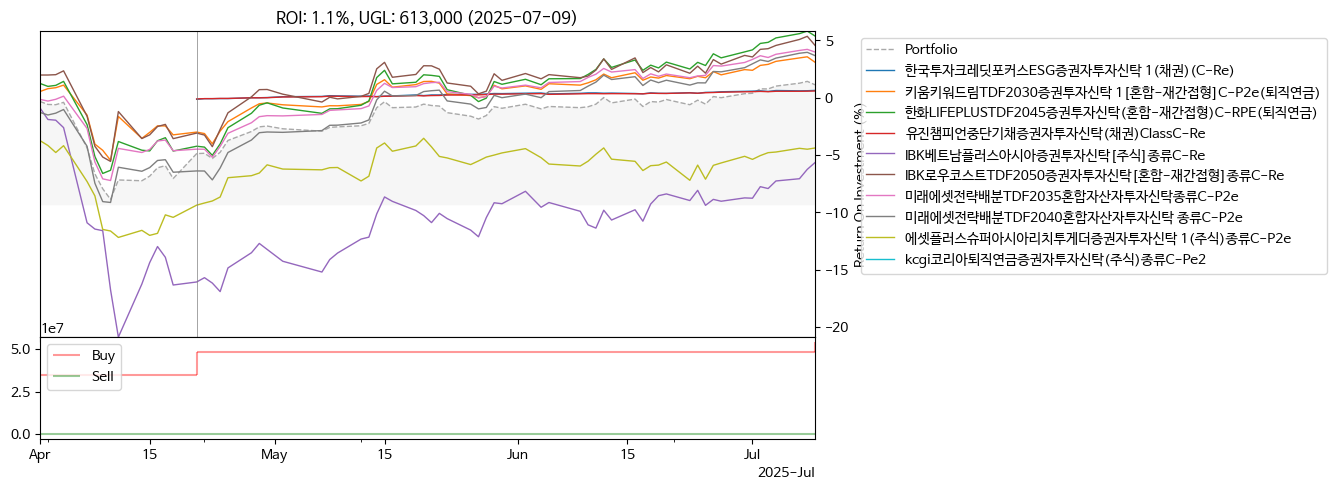

In [39]:
start = '2025-04-01'
#start = None
pf_tdf.plot(start, total=False, roi=True)

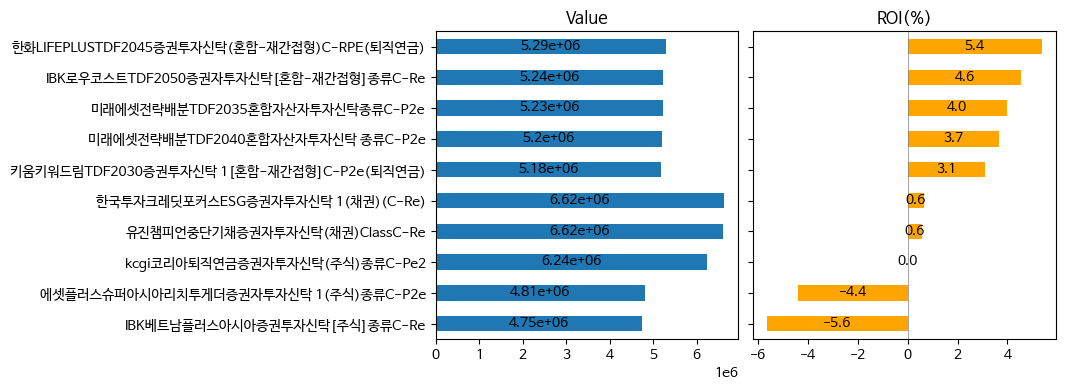

In [41]:
_ = pf_tdf.plot_assets(figsize=(8,4))

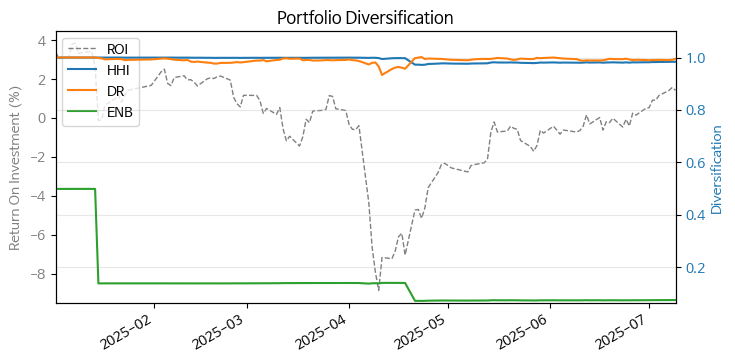

In [23]:
pf_tdf.diversification_history(start_date='2025-01-01')

In [24]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-07-09, 48148612, -102860, 48931289, 679817, 0.0141


start    2024-06-19
end      2025-07-09
buy      48,148,612
sell       -102,860
value    48,931,289
ugl         679,817
roi          0.0141
dtype: object

In [25]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [ ]:
tkrs = ['K55105CH3411', 'K55223BU8809', 'K55301BX0493', 'K55235CI9634', 'K55105BU7648', 'K55301BU6139', 'K55213C50702', 'K55234DF3150']
cash = [5e6, 5e6, 5e6, 5e6, 0, 0, 5e6, 5e6] # 0.111313, 0.684458 for cagr & y/sharpe
#cash = [0, 5e6, 5e6, 5e6, 0, 5e6, 5e6, 5e6] # 0.114441, 0.715891 for cagr & y/sharpe
#cash = [0, 5e6, 5e6, 0, 5e6, 5e6, 5e6, 5e6] # 0.105829, 0.736896
cash = [5e6, 0, 0, 5e6, 0, 5e6, 5e6, 5e6] # 0.111313, 0.684458 for cagr & y/sharpe

In [26]:
tkrs = ['K55105CH3411', 'K55235CI9634', 'K55301BU6139', 'K55213C50702', 'K55234DF3150', 'K55365BT3694']
cash = [5e6, 5e6, 5e6, 5e6, 5e6, 6243943]

In [27]:
buy = {k:v for k,v in zip(tkrs, cash) if v > 0}

_ = [print(f'{k} {fund_names[k]}: {v:,.0f}') for k,v in zip(tkrs, cash)]
sum(buy.values())

K55105CH3411 삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금): 5,000,000
K55235CI9634 피델리티인디아증권자투자신탁(주식-재간접형)종류CP-e: 5,000,000
K55301BU6139 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e: 5,000,000
K55213C50702 한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금): 5,000,000
K55234DF3150 IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re: 5,000,000
K55365BT3694 kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2: 6,243,943


31243943.0

In [28]:
#buy = {'K55365BT3694':6243943} # transaction 2025-07-09
buy = {'K55301BU6139':5e6, 'K55213C50702':5e6, 'K55234DF3150':5e6, 
       'K55235CI9634':5e6, 'K55105CH3411':5e6} # transaction 2025-07-10

In [33]:
date_actual='2025-07-07'
kw = dict(
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual=date_actual,
    buy = buy
)
_ = pf_tdf.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-07-09
Ticker names of None updated
All transactions saved to pf_tdf_static_250709.csv
ROI: 1.1%, UGL: 613,498 (2025-07-09)


In [79]:
kwargs = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2]
)
#_ = pf_tdf.transaction_pipeline(**kwargs)

In [34]:
pf_tdf.view_record(-1)

name  ratio  \
date       ticker                                                             
2025-07-09 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55365BT3694                kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-07-09 K55101BV9571            0  6625251     NaN    0.120 2025-07-07  
           K55206C95800            0  5210053  0.1429    0.094 2025-07-07  
           K55213C50702            0  5303562  0.1429    0.096 2025-07-07  
           K55214CD4825            0  6619944     NaN    0.120 2025-07-07  
           K55234BY9966            0  4781623  0.1429    0.086 2025-07-07  
           K55234DF3150            0  5247859  0.1429    0.095 2025-07-07  
           K55301BU6139            0  5268879  0.1429    0.095 2025-07-07  
           K55301BU6253            0  5215535  0.1429    0.094 2025-07-07  
           K55364CF7048            0  4844577  0.1429    0.088 2025-07-07  
           K55365BT3694      6243943  6243943     NaN    0.113 2025-07-07

In [7]:
pf_tdf.performance_stats(-2, sort_by='cagr')

,Simulated (250115),Simulated (250421),Realized
start,2023-03-29,2023-03-29,2024-06-20
end,2025-01-15,2025-04-21,2025-07-08
total_return,0.298031,0.191288,0.016521
cagr,0.155802,0.088488,0.015749
calmar,2.351425,1.07538,0.118673
max_drawdown,-0.066259,-0.082286,-0.132712
avg_drawdown,-0.009954,-0.008013,-0.03447
avg_drawdown_days,11.266667,12.061224,49.857143
monthly_vol,0.072987,0.063455,0.047368
monthly_sharpe,1.940094,1.317005,0.385042


## HANA

In [5]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [6]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

40 securities from 2023-03-29 to 2025-07-09 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_hana_static_240731.csv loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [7]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

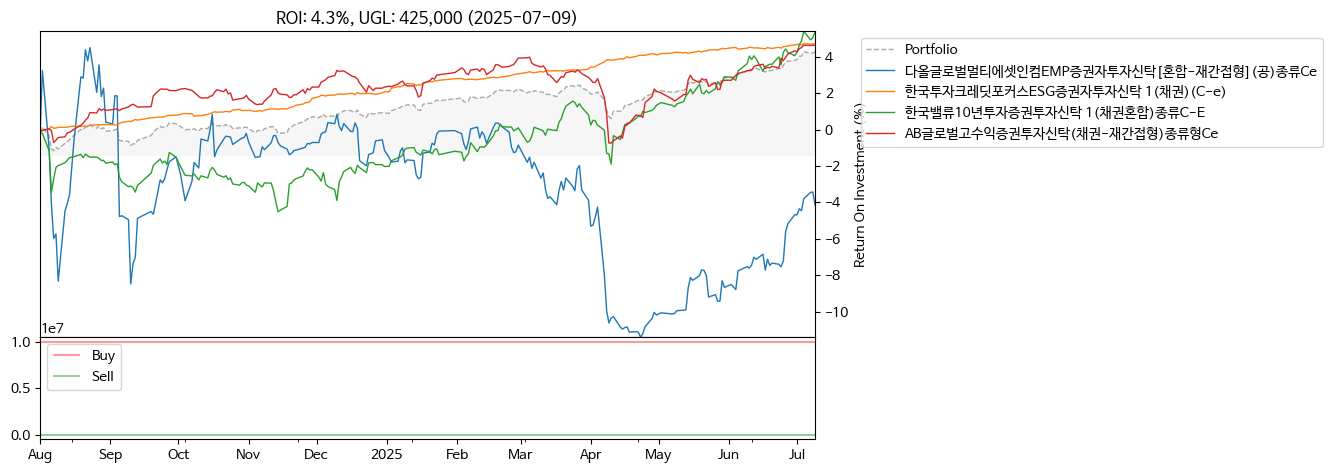

In [8]:
pf_hana.plot(total=False, roi=True)

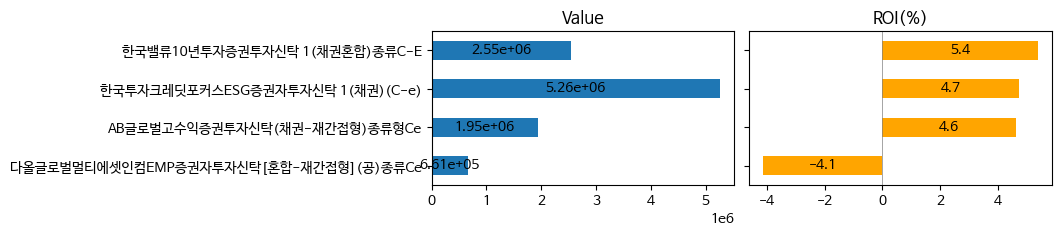

In [9]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

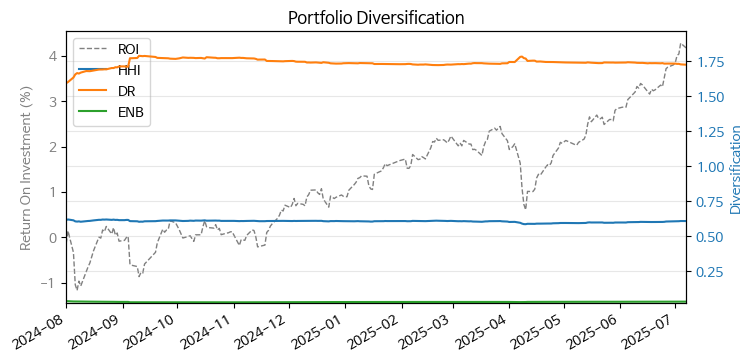

In [50]:
pf_hana.diversification_history()

In [144]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-05-08, 9990000, 0.0, 10193310, 203310, 0.0204


start    2024-08-01
end      2025-05-08
buy       9,990,000
sell            0.0
value    10,193,310
ugl         203,310
roi          0.0204
dtype: object

In [42]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [52]:
kwargs = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2]
)
_ = pf_hana.transaction_pipeline(**kwargs)

4 tickers selected by Selected from 2023-07-07 to 2025-07-07
Weights of tickers determined by Inv.Vol.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
Residual cash: 0
ROI: 3.1%, UGL: 363,178 (2025-07-07)
Set save=True to save transaction record


In [53]:
pf_hana.view_record()

name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-07-07 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-07-07 K55306CV9946      -269072   403499  0.0386    0.039 2025-07-07  
           KR5101888398      1718610  6991324  0.6681    0.668 2025-07-07  
           KR5236AS4826     -1196604  1363699  0.1303    0.130 2025-07-07  
           KR5370AP9956      -252934  1705623  0.1630    0.163 2025-07-07

In [16]:
pf_hana.performance_stats()

,Realized,Simulated
start,2024-08-02,2023-03-29
end,2025-06-27,2025-06-27
total_return,0.03603,0.163141
cagr,0.040079,0.069544
calmar,2.233076,3.890154
max_drawdown,-0.017948,-0.017877
avg_drawdown,-0.003405,-0.00237
avg_drawdown_days,10.869565,9.833333
monthly_vol,0.013836,0.024964
monthly_sharpe,3.29426,2.671603


## SAVE
연금저축

In [10]:
pf = 'SAVE_2503'

In [11]:
kw_st = dict(
    security_names = fund_names
)

In [12]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record(-1)

40 securities from 2023-03-29 to 2025-07-09 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_save_static_250709.csv loaded


name  ratio  \
date       ticker                                                          
2025-07-09 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55236BG3274             한국밸류10년투자연금증권전환형투자신탁 1(주식)C-E      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-07-09 K55101D20874            0  1647999    0.25    0.078 2025-07-07  
           K55107BU0252            0  2013272     NaN    0.096 2025-07-07  
           K55214B30803            0  1596365     NaN    0.076 2025-07-07  
           K55236BG3274            0  7161953     NaN    0.341 2025-07-07  
           K55307DH1659      4996857  6819487    0.25    0.325 2025-07-07  
           KR5235AK9808            0  1760747    0.25    0.084 2025-07-07

In [13]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
pf_save.update_record()

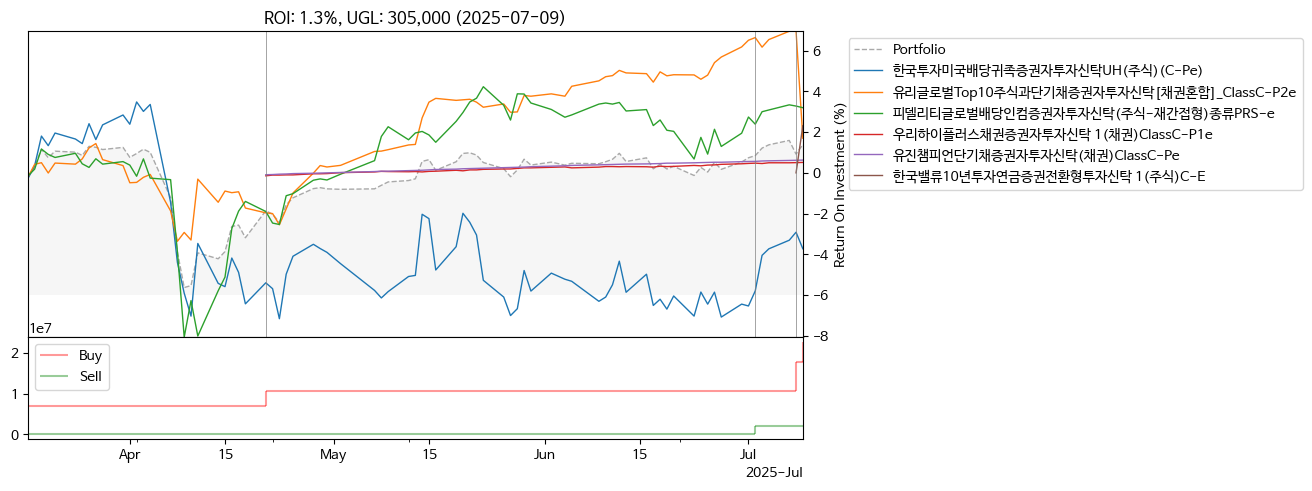

In [14]:
pf_save.plot(total=False, roi=True)

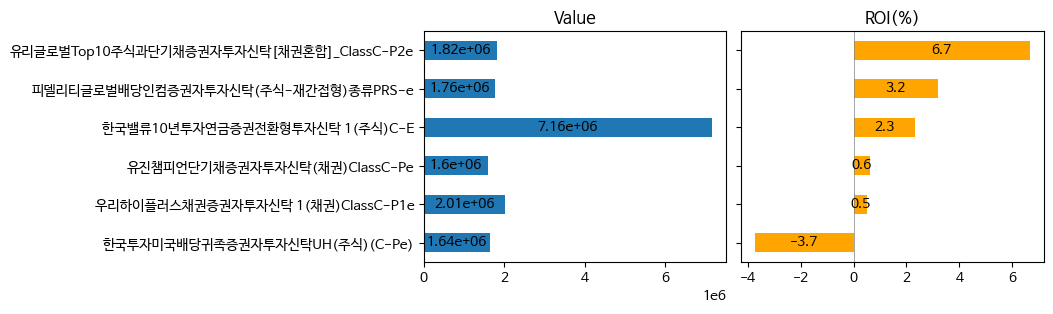

In [49]:
_ = pf_save.plot_assets(figsize=(8,3))

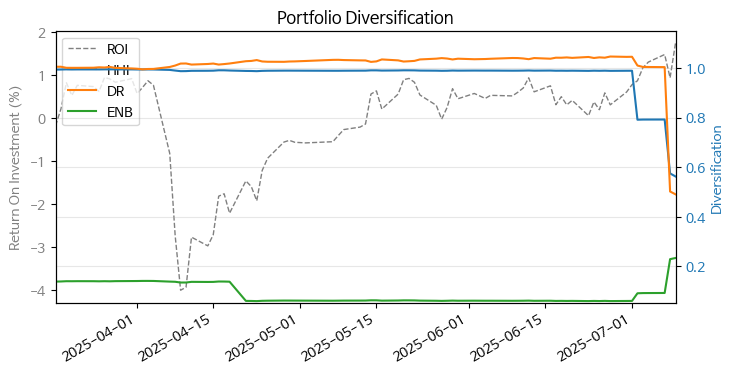

In [50]:
pf_save.diversification_history(start_date='2025-01-01')

In [51]:
date = None
#pf_save.valuate(date, print_msg=True, join_str=True)
pf_save.valuate(date, print_msg=True, int_to_str=False,total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
K55236BG3274,한국밸류10년투자연금증권전환형투자신탁 1(주식)C-E,2025-07-08,2025-07-09,7000000.0,0.000000,7161953.0,161953.000000,0.023136
K55307DH1659,유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e,2025-03-17,2025-07-09,1700000.0,-3450.174700,1817013.0,113562.825300,0.066802
KR5235AK9808,피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e,2025-03-17,2025-07-09,1700000.0,-2433.423337,1756759.0,54325.576663,0.031956
K55107BU0252,우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e,2025-04-21,2025-07-09,2000000.0,-1419.702132,2011617.0,10197.297868,0.005099
K55214B30803,유진챔피언단기채증권자투자신탁(채권)ClassC-Pe,2025-04-21,2025-07-09,1584916.0,-713.183408,1595534.0,9904.816592,0.006249
K55101D20874,한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe),2025-03-17,2025-07-09,1700000.0,-4271.808797,1640953.0,-63318.808797,-0.037246


In [52]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [53]:
date_actual='2025-07-07'

# 유리글로벌Top10, 피델리티글로벌배당인컴, 다올중국1등주, 한국밸류10년, 피델리티유럽
tkrs = ['K55307DH1659', 'KR5235AK9808', 'K55306BT9453', 'K55236BG3274', 'KR5235AK9691']
#cash = [2e6, 2e6, 2e6, 1e7, 2e6] # y/sharpe 1.38, cagr 0.12
#cash = [5e6, 3e6, 5e6, 7e6, 0] # y/sharpe 4.3, cagr 0.11
cash = [5e6, 2e6, 3e6, 7e6, 3e6] # y/sharpe 3.1, cagr 0.11
buy = {k:v for k,v in zip(tkrs, cash) if v > 0}

#buy = {'K55236BG3274':7e6} # transaction '2025-07-08'
buy = {'K55307DH1659':4996857} # transaction '2025-07-09'
#buy = {'KR5235AK9808':2e6, 'K55306BT9453':3e6, 'KR5235AK9691':3e6} # transaction after '2025-07-21'

kw = dict(
    buy = buy,
    #sell = sell,
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual=date_actual
)
_ = pf_save.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-07-09
All transactions saved to pf_save_static_250709.csv
ROI: 1.4%, UGL: 307,057 (2025-07-09)


In [13]:
kwargs = dict(
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    capital = WidgetTransaction[1],
    date_actual = date_actual
)
#_ = pf_save.transaction_pipeline(**kwargs)

6 tickers selected by Selected from 2024-11-18 to 2025-05-16
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
Residual cash: 3
ROI: 0.3%, UGL: 27,902 (2025-05-16)
Set save=True to save transaction record


In [54]:
pf_save.view_record(-1)

name  ratio  \
date       ticker                                                          
2025-07-09 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55236BG3274             한국밸류10년투자연금증권전환형투자신탁 1(주식)C-E      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-07-09 K55101D20874            0  1647999    0.25    0.078 2025-07-07  
           K55107BU0252            0  2013272     NaN    0.096 2025-07-07  
           K55214B30803            0  1596365     NaN    0.076 2025-07-07  
           K55236BG3274            0  7161953     NaN    0.341 2025-07-07  
           K55307DH1659      4996857  6819487    0.25    0.325 2025-07-07  
           KR5235AK9808            0  1760747    0.25    0.084 2025-07-07

In [57]:
pf_save.performance_stats(-4)

,Realized,Simulated (250421),Simulated (250702),Simulated (250708),Simulated (250709)
start,2025-03-18,2023-03-29,2023-03-29,2023-03-29,2023-03-29
end,2025-07-09,2025-04-21,2025-07-02,2025-07-08,2025-07-09
total_return,0.011413,0.162477,0.21412,0.302128,0.312467
cagr,0.037363,0.075655,0.089581,0.12288,0.126624
calmar,0.764016,1.973048,1.891776,1.462142,1.6237
max_drawdown,-0.048903,-0.038344,-0.047353,-0.084041,-0.077985
avg_drawdown,-0.019053,-0.004604,-0.006002,-0.011093,-0.009874
avg_drawdown_days,35.0,11.235294,13.708333,18.736842,16.27907
monthly_vol,0.0385,0.033862,0.035536,0.081032,0.069545
monthly_sharpe,0.355776,2.089316,2.295487,1.396092,1.672834


## FISA

In [59]:
kw_st = dict(
    method_select = 'selected'    
)

In [60]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record(-1)

40 securities from 2023-03-29 to 2025-07-09 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_fisa_static_250604.csv loaded


name  ratio  \
date       ticker                                                       
2025-06-04 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-06-04 K55107BB0404            0  10036457  0.3226    0.317 2024-06-02  
           K55210CO3737            0   5147591     NaN    0.163 2024-06-02  
           KR5101888398            0  10042122  0.3226    0.317 2024-06-02  
           KR5236AS4818       215435   3411673  0.0968    0.108 2024-06-02  
           KR5370AP9949            0   3027847     NaN    0.096 2024-06-02

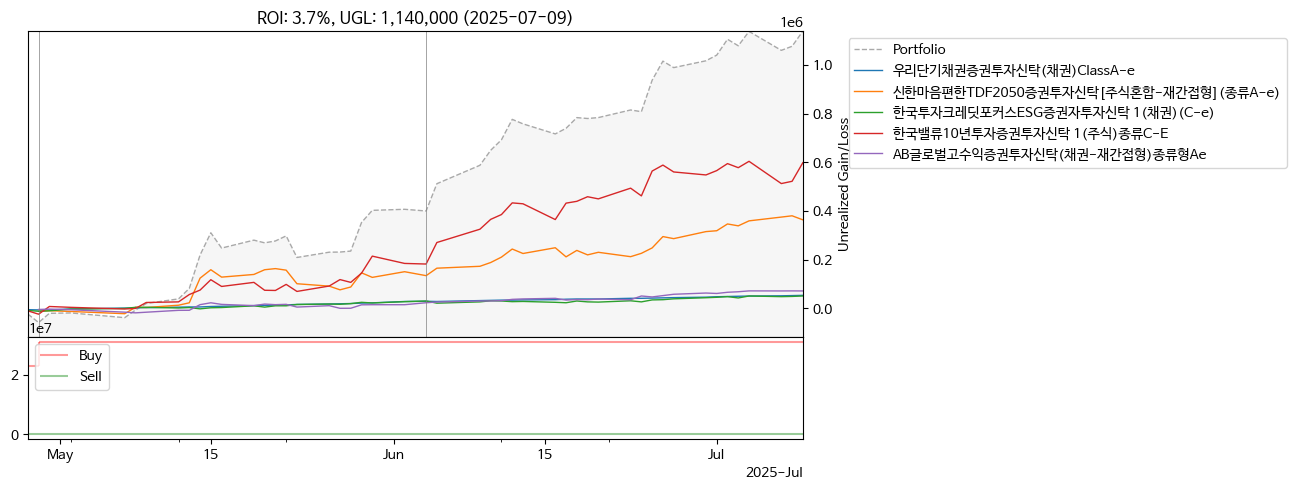

In [61]:
pf_fisa.plot(total=False, roi=False)

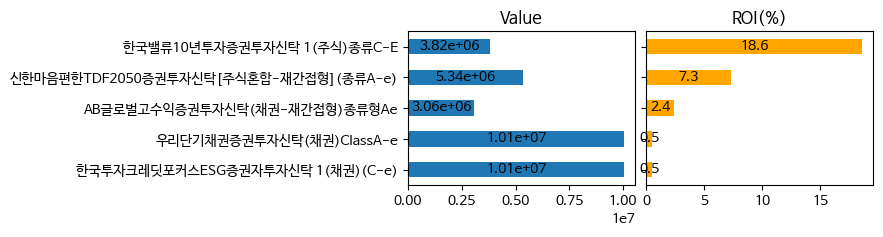

In [18]:
_ = pf_fisa.plot_assets(roi=True, figsize=(6,2))

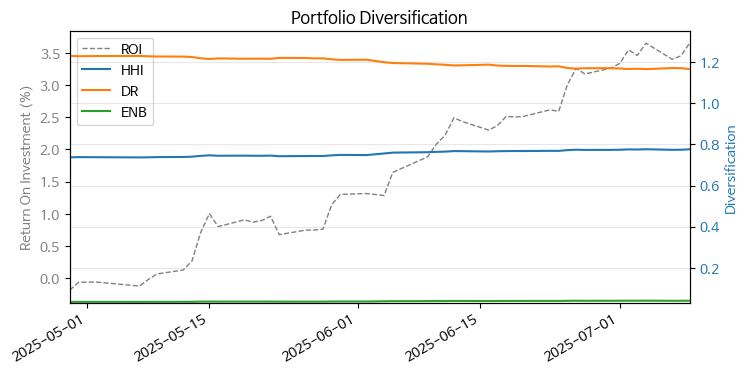

In [19]:
pf_fisa.diversification_history()

In [20]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-07-09, 31176035, -14161, 32329949, 1139753, 0.0366


start    2025-04-28
end      2025-07-09
buy      31,176,035
sell        -14,161
value    32,329,949
ugl       1,139,753
roi          0.0366
dtype: object

In [21]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [18]:
date_actual='2024-06-02'

# new buy
#tickers = ['K55210CO3737','KR5370AP9949']
#capital = [5e6, 3e6]
#capital = dict(zip(tickers, capital))

capital = {'KR5236AS4818': 215435}

kw = dict(
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual=date_actual,
    buy = capital
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record()

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-06-04
All transactions saved to pf_fisa_static_250604.csv
ROI: 1.3%, UGL: 400,470 (2025-06-04)


name  ratio  \
date       ticker                                                       
2025-04-28 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
2025-04-29 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   
2025-06-04 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-04-28 K55107BB0404     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5101888398     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5236AS4818      3000000   3000000  0.0968    0.130 2024-04-25  
2025-04-29 K55107BB0404            0  10000934  0.3226    0.323 2024-04-25  
           K55210CO3737      5000000   5000000     NaN    0.161 2025-04-25  
           KR5101888398            0  10000000  0.3226    0.323 2024-04-25  
           KR5236AS4818            0   2990013  0.0968    0.096 2024-04-25  
           KR5370AP9949      3000000   3000000     NaN    0.097 2025-04-25  
2025-06-04 K55107BB0404            0  10036457  0.3226    0.317 2024-06-02  
           K55210CO3737            0   5147591     NaN    0.163 2024-06-02  
           KR5101888398            0  10042122  0.3226    0.317 2024-06-02  
           KR5236AS4818       215435   3411673  0.0968    0.108 2024-06-02  
           KR5370AP9949            0   3027847     NaN    0.096 2024-06-02

In [16]:
kwargs = dict(
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    capital = WidgetTransaction[1],
    #date_actual = date_actual
)
_ = pf_fisa.transaction_pipeline(**kwargs)

23 tickers selected by All from 2024-10-30 to 2025-04-30
Weights of tickers determined by Equal weights.
ERROR: Neither capital nor tickers to rebalance exists


## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2]
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

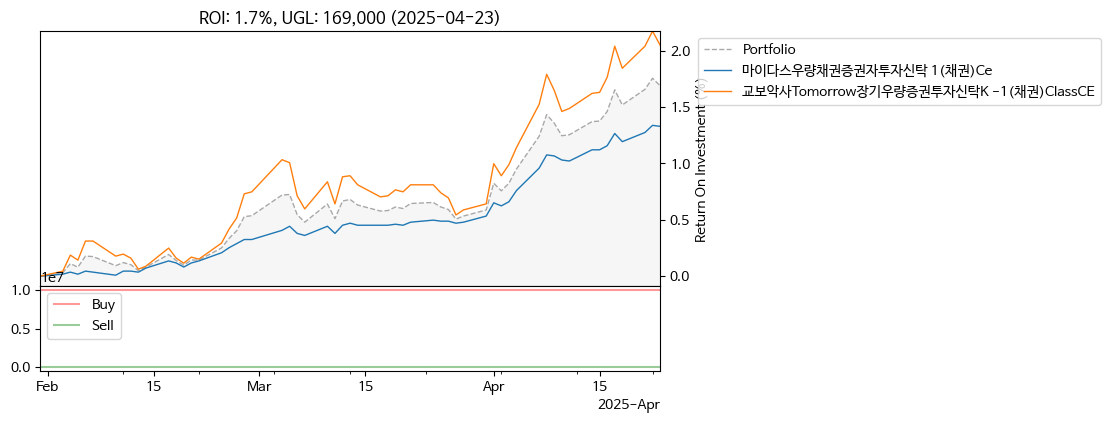

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

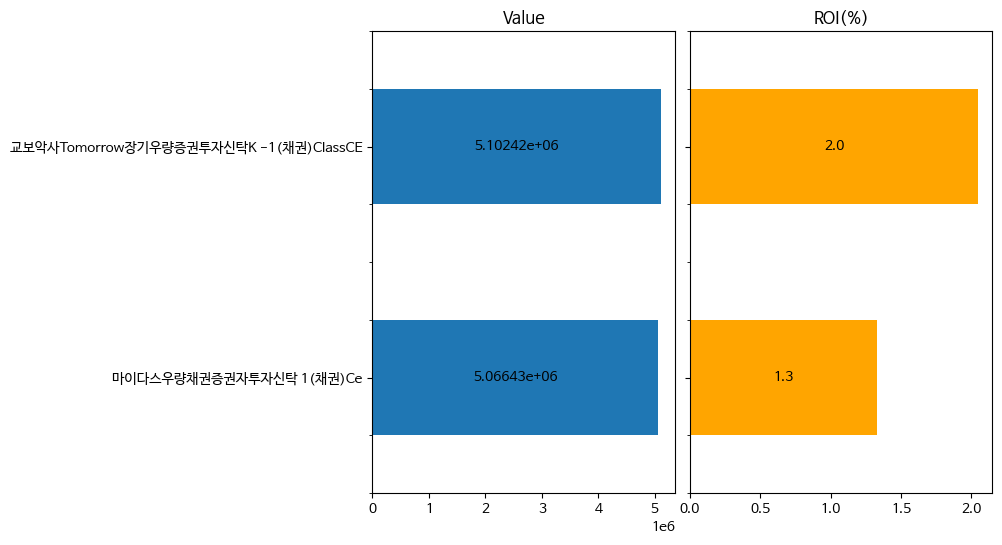

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing

In [89]:
dm.get_names(tickers)

0) K55301BU6139(fund): 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800(fund): 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55301BU6253(fund): 미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e
3) K55234DF3150(fund): IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re
4) K55213C50702(fund): 한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)
5) K55210CO3737(fund): 신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)

In [86]:
tkrs = dm.get_names(tickers).keys()
[x for x in tkrs if x not in dm.get_prices().columns]

['K55206C95800(fund)', 'K55301BU6253(fund)', 'K55210CO3737(fund)']

In [83]:
dm.get_prices().columns

Index(['K55301BU6139(fund)', 'K55365BT3694(fund)', 'KR5101888398(fund)',
       'KR5370AP9956(fund)', 'K55234DF3150(fund)', 'K55213C50702(fund)',
       'K55107BU0252(fund)', 'K55206C11278(fund)', 'K55214B30803(fund)',
       'K55306BT9453(fund)', 'KR5235AK9691(fund)', 'K55105BU7648(fund)',
       'K55105CH3411(fund)', 'K55223BU8809(fund)', 'K55301BX0493(fund)',
       'K55301CC8789(fund)', 'K55101BV9571(fund)', 'K55214CD4825(fund)',
       'K55107BB0404(fund)', 'KR5370AP9949(fund)', 'K55235CI9634(fund)',
       'K55105BV6805(fund)', 'K55234BX9892(fund)', 'K55364BU0797(fund)',
       'KR5236267161(fund)', 'KR5363AC3714(fund)'],
      dtype='object')

In [100]:
def get_names(self, tickers=None, universes=None, search=None, reset=False):
    """
    tickers: None, a ticker, list of tickers or 'selected'
    search: word to search in ticker names
    universes: list of universes to search tickers
    """
    multiverse = self.check_universes(universes, loading=False)
    if len(multiverse) == 0:
        return None

    # find universe for each ticker
    if isinstance(tickers, str):
        tickers = tickers if tickers.lower() == 'selected' else [tickers]
    security_names = dict()
    for name, uv in multiverse.items():
        sname = uv.get_names(tickers, reset)
        if sname is None:
            continue
        #sname = {f'{k}({name})': v for k,v in sname.items()}
        sname = {self.tickers_in_multiverse[k]: v for k,v in sname.items()}
        security_names = {**security_names, **sname}

    # search word in name
    if search is not None:
        security_names = {k:v for k,v in security_names.items() if search in v}
    return SecurityDict(security_names, names=security_names)



def get_prices(self, tickers=None, universes=None):
    """
    merge price data from universes by adding universe name to column names 
    """
    multiverse = self.check_universes(universes, loading=False)
    if len(multiverse) == 0:
        return None

    df_prices = None
    for name, uv in multiverse.items():
        df_p = uv.df_prices.copy() # use copy not to contaminate uv.df_prices
        if df_p is None:
            continue
        # update column names with universe name
        df_p.columns = [self.tickers_in_multiverse[x] for x in df_p.columns]
        df_prices = df_p if df_prices is None else pd.concat([df_prices, df_p], axis=1)

    # check given tickers with price data
    if tickers is not None:
        tkrs = self.get_names(tickers=tickers, universes=universes).keys()
        tkrs = [x for x in tkrs if x not in df_prices.columns]
        if len(tkrs) > 0:
            print('Check tickers missing in price data')
            return [x for x in tickers if self.tickers_in_multiverse[x] in tkrs]
    
    return df_prices
        

from pf_utils import SecurityDict

In [105]:
get_prices(dm, tickers=tickers, universes=['fund'])

Check tickers missing in price data


['K55301BU6253', 'K55206C95800', 'K55210CO3737']

In [102]:
get_prices(dm)

,K55301BU6139(fund),K55365BT3694(fund),KR5101888398(fund),KR5370AP9956(fund),K55234DF3150(fund),K55213C50702(fund),K55107BU0252(fund),K55206C11278(fund),K55214B30803(fund),K55306BT9453(fund),...,K55101BV9571(fund),K55214CD4825(fund),K55107BB0404(fund),KR5370AP9949(fund),K55235CI9634(fund),K55105BV6805(fund),K55234BX9892(fund),K55364BU0797(fund),KR5236267161(fund),KR5363AC3714(fund)
date,,,,,,,,,,,,,,,,,,,,,
2008-11-17,NaN,NaN,623.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-18,NaN,NaN,623.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-19,NaN,NaN,623.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-20,NaN,NaN,623.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-21,NaN,NaN,624.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-04,1573.8,1481.8,1122.6,1353.4,1410.3,1676.4,1106.9,1084.7,1101.0,1519.2,...,1118.2,1131.1,1075.9,1392.2,2250.2,1379.7,1652.1,1911.3,1183.7,1183.9
2025-07-07,1578.8,1435.0,1122.4,1353.3,1417.1,1682.2,1106.9,1084.8,1101.2,1518.7,...,1117.9,1131.1,1076.2,1391.9,2273.4,1351.4,1612.6,1839.4,1153.9,1155.2
2025-07-08,1580.2,1449.0,1122.6,1353.4,1420.8,1685.7,1107.1,1085.0,1101.3,1521.3,...,1118.0,1131.2,1076.2,1392.2,2283.7,1356.2,1623.4,1882.9,1162.3,1160.3


In [94]:
dm.get_prices(tickers)

ERROR: No universe such as K55301BU6253, K55206C95800, K55210CO3737, K55213C50702, K55234DF3150, K55301BU6139
Universes available: fund


In [95]:
dm.tickers_in_multiverse

{'K55234DF2657': 'K55234DF2657(fund)',
 'K55234DF2459': 'K55234DF2459(fund)',
 'K55301BU6139': 'K55301BU6139(fund)',
 'K55105BU1161': 'K55105BU1161(fund)',
 'K55210BU2385': 'K55210BU2385(fund)',
 'K55206C95800': 'K55206C95800(fund)',
 'K55210BU2435': 'K55210BU2435(fund)',
 'K55213C51890': 'K55213C51890(fund)',
 'K55223BT1450': 'K55223BT1450(fund)',
 'K55105BS5067': 'K55105BS5067(fund)',
 'K55101BY3944': 'K55101BY3944(fund)',
 'K55301BU5453': 'K55301BU5453(fund)',
 'K55301BU5479': 'K55301BU5479(fund)',
 'K55210BU2450': 'K55210BU2450(fund)',
 'K55206C96311': 'K55206C96311(fund)',
 'KR5223AE3357': 'KR5223AE3357(fund)',
 'K55365BT3694': 'K55365BT3694(fund)',
 'K55207BU0715': 'K55207BU0715(fund)',
 'K55203C53681': 'K55203C53681(fund)',
 'K55234CJ0997': 'K55234CJ0997(fund)',
 'K55301BU6253': 'K55301BU6253(fund)',
 'K55101BT7397': 'K55101BT7397(fund)',
 'K55364CF7048': 'K55364CF7048(fund)',
 'K55303BT4176': 'K55303BT4176(fund)',
 'K55234BY9966': 'K55234BY9966(fund)',
 'K55235BW6799': 'K55235B